<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Data_Engineering_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=3da94f919fd4f1216d6c4d03658068fbaa80dbf13146bec77037f1a2b968bc85
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, StringType
import pyspark.sql  as pyspark_sql
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import date_format, max, col,  when,  lit, weekofyear, current_date, month, avg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

#Loading Given Dataset

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [ ]:
schema = StructType([
    StructField("HCHO reading", DoubleType(), True),
    StructField("Location", StringType(), True),
    StructField("Current Date", StringType(), True),
    StructField("Next Date", StringType(), True)
])


In [ ]:
drive.mount("/content/drive")

col_mat_nuw_data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/col_mat_nuw_output.csv", header=False, schema=schema)
kan_data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/kan_output.csv", header=False, schema=schema)
mon_kur_jaf_data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/mon_kur_jaf_output.csv", header=False, schema=schema)

Mounted at /content/drive


In [ ]:
print("Colombo, Matara & Nuwara Eliya")
col_mat_nuw_data.printSchema()

print("Kandy")
kan_data.printSchema()

print("Monaragala, Kurunegala & Jaffna")
mon_kur_jaf_data.printSchema()

Colombo, Matara & Nuwara Eliya
root
 |-- HCHO reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)

Kandy
root
 |-- HCHO reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)

Monaragala, Kurunegala & Jaffna
root
 |-- HCHO reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)



In [ ]:
col_mat_nuw_data.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [ ]:
kan_data.show()

+--------------------+------------+------------+----------+
|        HCHO reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|                NULL|Kandy Proper|  2019-01-13|2019-01-14|
|                NULL|Kandy Proper|  201

In [ ]:
mon_kur_jaf_data.show()

+--------------------+------------------+------------+----------+
|        HCHO reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|         

#Data Preprocessing

##Seperating Dataset

In [ ]:
Monaragala_Data = mon_kur_jaf_data.filter(mon_kur_jaf_data['Location'] == 'Bibile, Monaragala')

In [ ]:
Monaragala_Data.show()

+--------------------+------------------+------------+----------+
|        HCHO reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|         

In [ ]:
Kurunegala_Data = mon_kur_jaf_data.filter(mon_kur_jaf_data['Location'] == 'Kurunegala Proper')

In [ ]:
Kurunegala_Data.show()

+--------------------+-----------------+------------+----------+
|        HCHO reading|         Location|Current Date| Next Date|
+--------------------+-----------------+------------+----------+
|8.829725542537962E-5|Kurunegala Proper|  2019-01-01|2019-01-02|
|1.370787402778218...|Kurunegala Proper|  2019-01-02|2019-01-03|
|1.480085027113037E-4|Kurunegala Proper|  2019-01-03|2019-01-04|
|-2.04637905973554...|Kurunegala Proper|  2019-01-04|2019-01-05|
|2.489134742856164E-4|Kurunegala Proper|  2019-01-05|2019-01-06|
|1.015583300177078...|Kurunegala Proper|  2019-01-06|2019-01-07|
|1.919056668190272...|Kurunegala Proper|  2019-01-07|2019-01-08|
|1.215500456138868...|Kurunegala Proper|  2019-01-08|2019-01-09|
|9.741700467262773E-5|Kurunegala Proper|  2019-01-09|2019-01-10|
|1.130342628012010...|Kurunegala Proper|  2019-01-10|2019-01-11|
|7.047632943988818E-5|Kurunegala Proper|  2019-01-11|2019-01-12|
|1.691712548577679E-4|Kurunegala Proper|  2019-01-12|2019-01-13|
|                NULL|Kur

In [ ]:
Jaffna_Data = mon_kur_jaf_data.filter(mon_kur_jaf_data['Location'] == 'Jaffna Proper')

In [ ]:
Jaffna_Data.show()

+--------------------+-------------+------------+----------+
|        HCHO reading|     Location|Current Date| Next Date|
+--------------------+-------------+------------+----------+
|5.830909719406619E-5|Jaffna Proper|  2019-01-01|2019-01-02|
|1.017952795536237...|Jaffna Proper|  2019-01-02|2019-01-03|
| 3.93133105404262E-5|Jaffna Proper|  2019-01-03|2019-01-04|
|-2.38398465761844...|Jaffna Proper|  2019-01-04|2019-01-05|
|1.589137302293815...|Jaffna Proper|  2019-01-05|2019-01-06|
|7.539679629744287E-5|Jaffna Proper|  2019-01-06|2019-01-07|
|1.799237734955577...|Jaffna Proper|  2019-01-07|2019-01-08|
|9.470708011674723E-5|Jaffna Proper|  2019-01-08|2019-01-09|
|2.109364950895559E-6|Jaffna Proper|  2019-01-09|2019-01-10|
|1.318967807501841...|Jaffna Proper|  2019-01-10|2019-01-11|
|1.337016372402064...|Jaffna Proper|  2019-01-11|2019-01-12|
|5.957003084127642...|Jaffna Proper|  2019-01-12|2019-01-13|
|-4.15786713782524...|Jaffna Proper|  2019-01-13|2019-01-14|
|2.010835129084908E-5|Ja

In [ ]:
Colombo_Data = col_mat_nuw_data.filter(col_mat_nuw_data['Location'] == 'Colombo Proper')

In [ ]:
Colombo_Data.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [ ]:
Deniyaya_Matara_Data = col_mat_nuw_data.filter(col_mat_nuw_data['Location'] == 'Deniyaya, Matara')

In [ ]:
Deniyaya_Matara_Data.show()

+--------------------+----------------+------------+----------+
|        HCHO reading|        Location|Current Date| Next Date|
+--------------------+----------------+------------+----------+
|                NULL|Deniyaya, Matara|  2019-01-01|2019-01-02|
|5.803530712000793E-6|Deniyaya, Matara|  2019-01-02|2019-01-03|
|2.362357772653922...|Deniyaya, Matara|  2019-01-03|2019-01-04|
|6.437245753953118E-5|Deniyaya, Matara|  2019-01-04|2019-01-05|
|5.349707092885017E-5|Deniyaya, Matara|  2019-01-05|2019-01-06|
|1.315594859189690...|Deniyaya, Matara|  2019-01-06|2019-01-07|
|6.269859896976347E-5|Deniyaya, Matara|  2019-01-07|2019-01-08|
|2.298263979970634E-5|Deniyaya, Matara|  2019-01-08|2019-01-09|
|                NULL|Deniyaya, Matara|  2019-01-09|2019-01-10|
|7.190247186715247E-5|Deniyaya, Matara|  2019-01-10|2019-01-11|
|1.542091441034087...|Deniyaya, Matara|  2019-01-11|2019-01-12|
|1.406986305217021E-4|Deniyaya, Matara|  2019-01-12|2019-01-13|
|                NULL|Deniyaya, Matara| 

In [ ]:
Nuwara_Eliya_Data = col_mat_nuw_data.filter(col_mat_nuw_data['Location'] == 'Nuwara Eliya Proper')

In [ ]:
Nuwara_Eliya_Data.show()

+--------------------+-------------------+------------+----------+
|        HCHO reading|           Location|Current Date| Next Date|
+--------------------+-------------------+------------+----------+
|                NULL|Nuwara Eliya Proper|  2019-01-01|2019-01-02|
|                NULL|Nuwara Eliya Proper|  2019-01-02|2019-01-03|
|1.908293886956784...|Nuwara Eliya Proper|  2019-01-03|2019-01-04|
|5.097625917127737...|Nuwara Eliya Proper|  2019-01-04|2019-01-05|
|6.456645496655256E-5|Nuwara Eliya Proper|  2019-01-05|2019-01-06|
|8.982348709518115E-5|Nuwara Eliya Proper|  2019-01-06|2019-01-07|
|4.097797651418246E-5|Nuwara Eliya Proper|  2019-01-07|2019-01-08|
|                NULL|Nuwara Eliya Proper|  2019-01-08|2019-01-09|
|                NULL|Nuwara Eliya Proper|  2019-01-09|2019-01-10|
|                NULL|Nuwara Eliya Proper|  2019-01-10|2019-01-11|
|3.914670787137749E-5|Nuwara Eliya Proper|  2019-01-11|2019-01-12|
|                NULL|Nuwara Eliya Proper|  2019-01-12|2019-01

In [ ]:
row_count = Colombo_Data.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


Saving Seperated Datasets

In [ ]:
# Convert the subset data to Pandas DataFrame
Monaragala_Data_pd = Monaragala_Data.toPandas()
Kurunegala_Data_pd = Kurunegala_Data.toPandas()
Jaffna_Data_pd = Jaffna_Data.toPandas()
Colombo_Data_pd = Colombo_Data.toPandas()
Deniyaya_Matara_Data_pd = Deniyaya_Matara_Data.toPandas()
Nuwara_Eliya_Data_pd = Nuwara_Eliya_Data.toPandas()

In [ ]:
Colombo_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/colombo_data.csv', index=False)

In [ ]:
Deniyaya_Matara_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/deniyaya_matara_data.csv', index=False)

In [ ]:
Nuwara_Eliya_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/nuwara_eliye_data.csv', index=False)

In [ ]:
Monaragala_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/monaragala_data.csv', index=False)

In [ ]:
Kurunegala_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/kurunegala_data.csv', index=False)

In [ ]:
Jaffna_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/jaffna_data.csv', index=False)

##Looking for null values

In [ ]:
def null_values_per_column(df, name):
    for col in df.columns:
        null_count = df.filter(df[col].isNull()).count()
        if null_count > 0:
            print(f"City: {name}, Column: '{col}', Number of null values: {null_count}")
        else:
          print('no null values')


In [ ]:
null_values_per_column(Colombo_Data, 'Colombo')
null_values_per_column(Deniyaya_Matara_Data, 'Matara')
null_values_per_column(Nuwara_Eliya_Data, 'Nuwara Eliye')
null_values_per_column(Monaragala_Data, 'Monaragala')
null_values_per_column(Kurunegala_Data, 'Kurunegala')
null_values_per_column(Jaffna_Data, 'Jaffna')
null_values_per_column(kan_data, 'Kandy')

City: Colombo, Column: 'HCHO reading', Number of null values: 487
no null values
no null values
no null values
City: Matara, Column: 'HCHO reading', Number of null values: 847
no null values
no null values
no null values
City: Nuwara Eliye, Column: 'HCHO reading', Number of null values: 1085
no null values
no null values
no null values
City: Monaragala, Column: 'HCHO reading', Number of null values: 695
no null values
no null values
no null values
City: Kurunegala, Column: 'HCHO reading', Number of null values: 592
no null values
no null values
no null values
City: Jaffna, Column: 'HCHO reading', Number of null values: 365
no null values
no null values
no null values
City: Kandy, Column: 'HCHO reading', Number of null values: 793
no null values
no null values
no null values


##Visualizing Data For Preprocessing

###Plot of HCHO reading

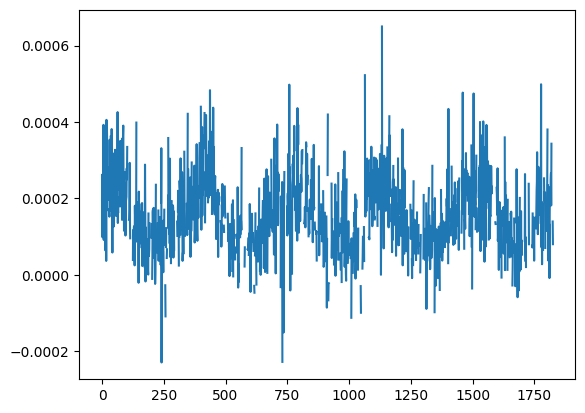

In [ ]:
plt.plot(Colombo_Data_pd['HCHO reading'])

###Plot of HCHO level Average per Month

In [ ]:

def plot_HCHO_level_average_vs_month_graph(df, name):
  df_monthly_avg_data = df.groupBy(date_format('Current Date', 'yyyy-MM').alias('month')).agg(avg('HCHO reading').alias('Monthly Average HCHO level'))
  df_monthly_avg_data_sorted = df_monthly_avg_data.orderBy('month')
  pandas_df = df_monthly_avg_data_sorted.toPandas()

  plt.figure(figsize=(10, 6))
  plt.plot(pandas_df['month'], pandas_df['Monthly Average HCHO level'], marker='o', color='b')

  plt.title(f'Monthly Average HCHO Level in {name}')
  plt.xlabel('Month')
  plt.ylabel('Average HCHO Level')

  plt.xticks(rotation=90)

  plt.grid(True)
  plt.tight_layout()
  plt.show()

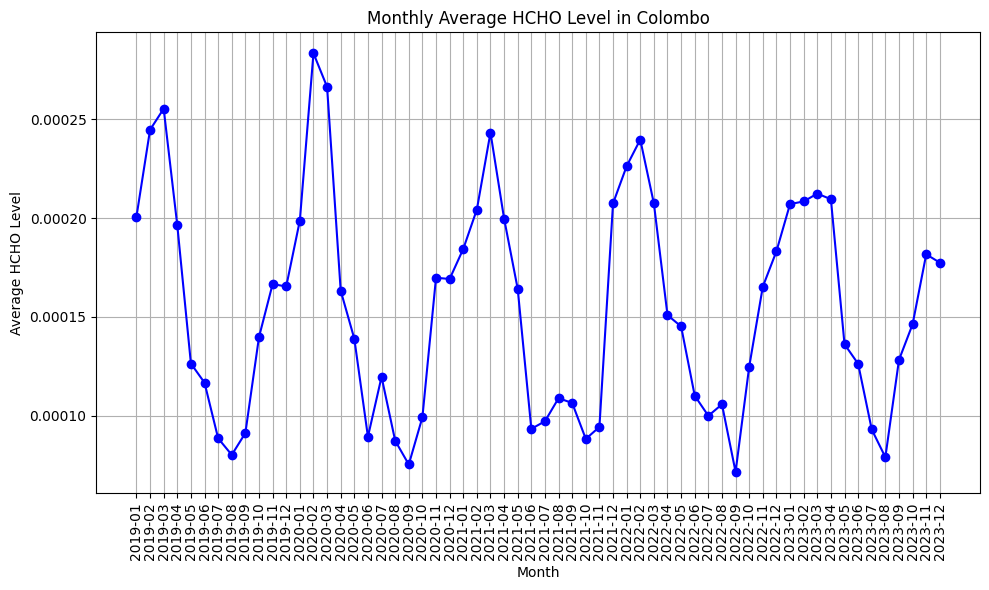

In [ ]:
plot_HCHO_level_average_vs_month_graph(Colombo_Data, 'Colombo')

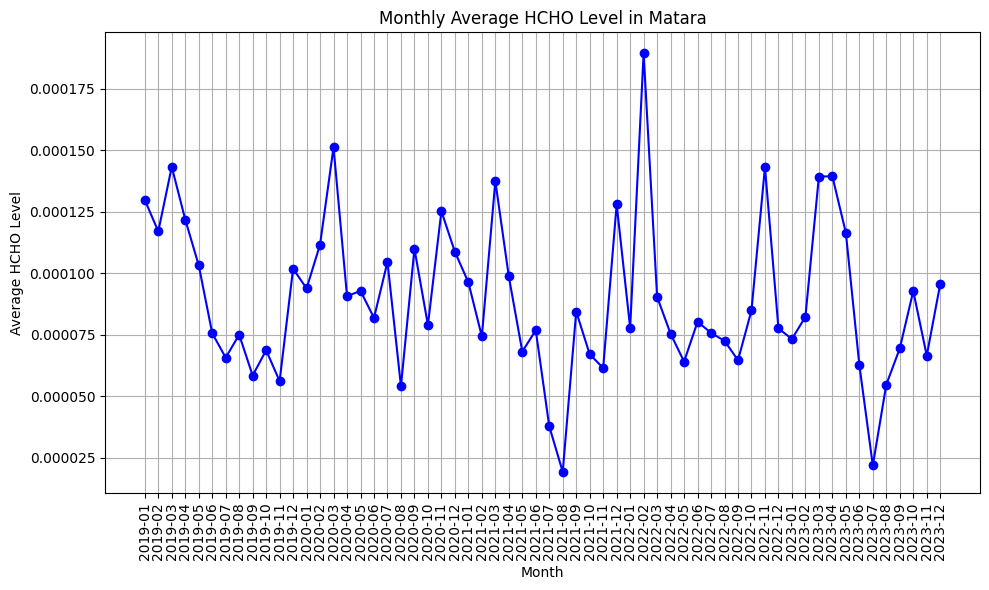

In [ ]:
plot_HCHO_level_average_vs_month_graph(Deniyaya_Matara_Data, 'Matara')

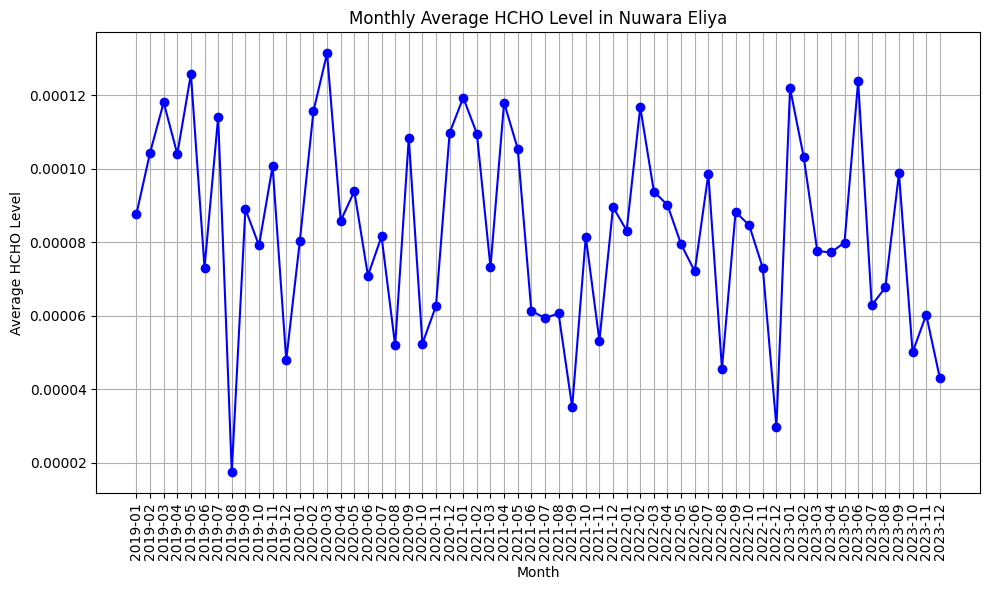

In [ ]:
plot_HCHO_level_average_vs_month_graph(Nuwara_Eliya_Data, 'Nuwara Eliya')

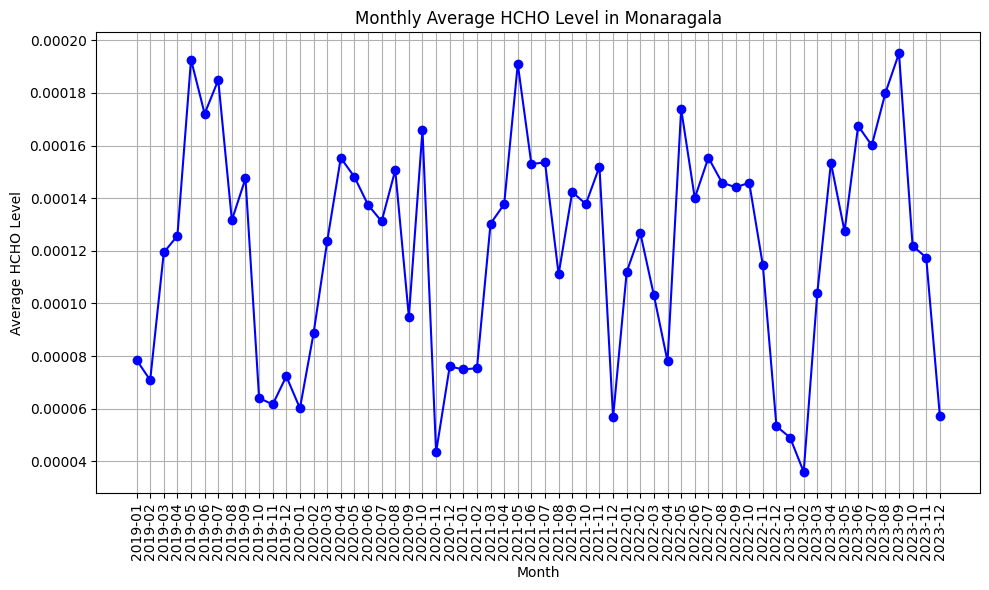

In [ ]:
plot_HCHO_level_average_vs_month_graph(Monaragala_Data, 'Monaragala')

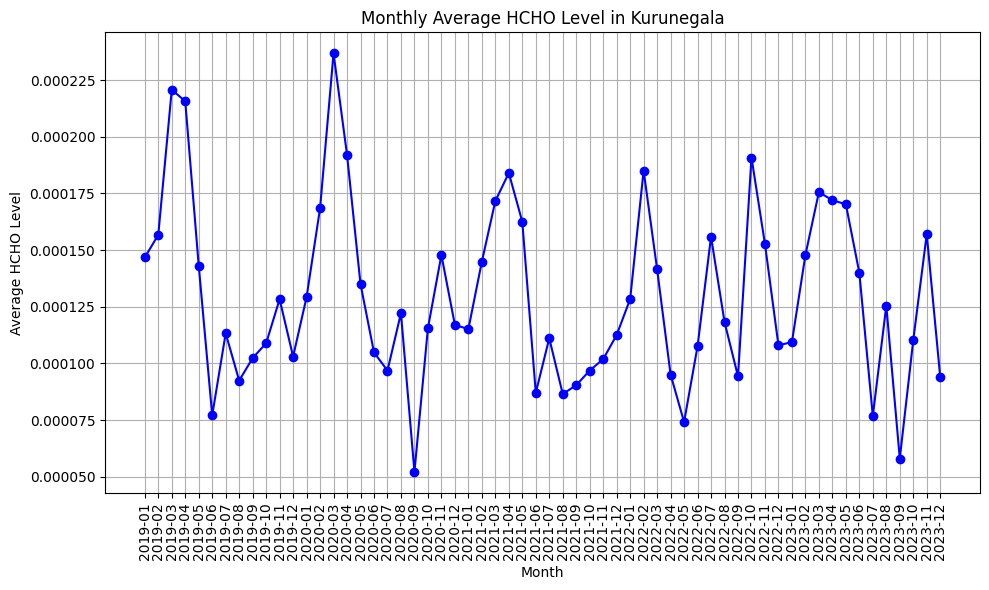

In [ ]:
plot_HCHO_level_average_vs_month_graph(Kurunegala_Data, 'Kurunegala')

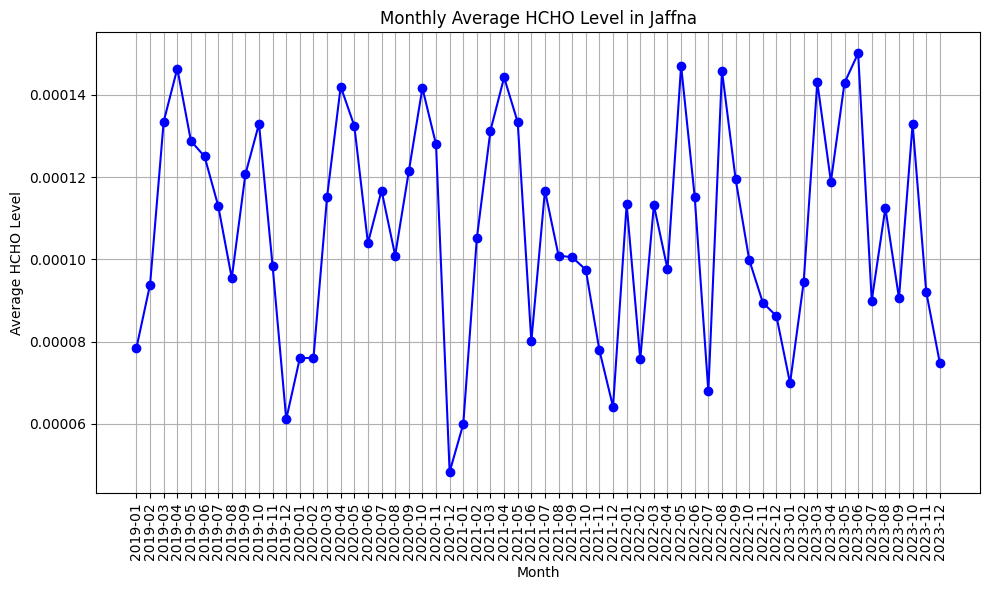

In [ ]:
plot_HCHO_level_average_vs_month_graph(Jaffna_Data, 'Jaffna')

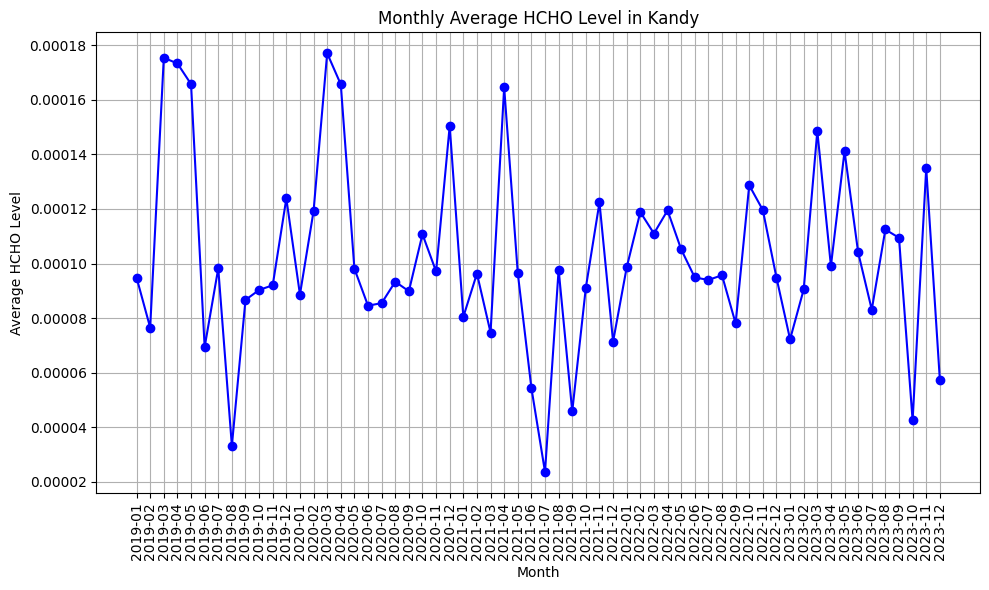

In [ ]:
plot_HCHO_level_average_vs_month_graph(kan_data, 'Kandy')

###Plot of HCHO levels average per week

In [ ]:

def plot_HCHO_average_vs_week(df, city):
    combined_df = pd.DataFrame(columns=['week', 'year', 'average_HCHO_level'])

    for year in [2019, 2020, 2021, 2022, 2023]:
        df_year = df.filter((col('Current Date') >= f'{year}-01-01') & (col('Current Date') < f'{year + 1}-01-01'))
        weekly_avg_data = df_year.groupBy(weekofyear('Current Date').alias('week')).agg(avg('HCHO reading').alias('average_HCHO_level'))
        weekly_avg_data = weekly_avg_data.orderBy('week')
        weekly_avg_data = weekly_avg_data.withColumn('year', lit(year))

        weekly_avg_data_pd = weekly_avg_data.toPandas()

        combined_df = pd.concat([combined_df, weekly_avg_data_pd], ignore_index=True)

    plt.figure(figsize=(12, 6))
    for year in combined_df['year'].unique():
        year_data = combined_df[combined_df['year'] == year]
        plt.plot(year_data['week'], year_data['average_HCHO_level'], marker='o', label=year)

    plt.title(f'Weekly Average HCHO Level in {city} (2019-2023)')
    plt.xlabel('Week')
    plt.ylabel('Average HCHO Level')
    plt.legend(title='Year', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


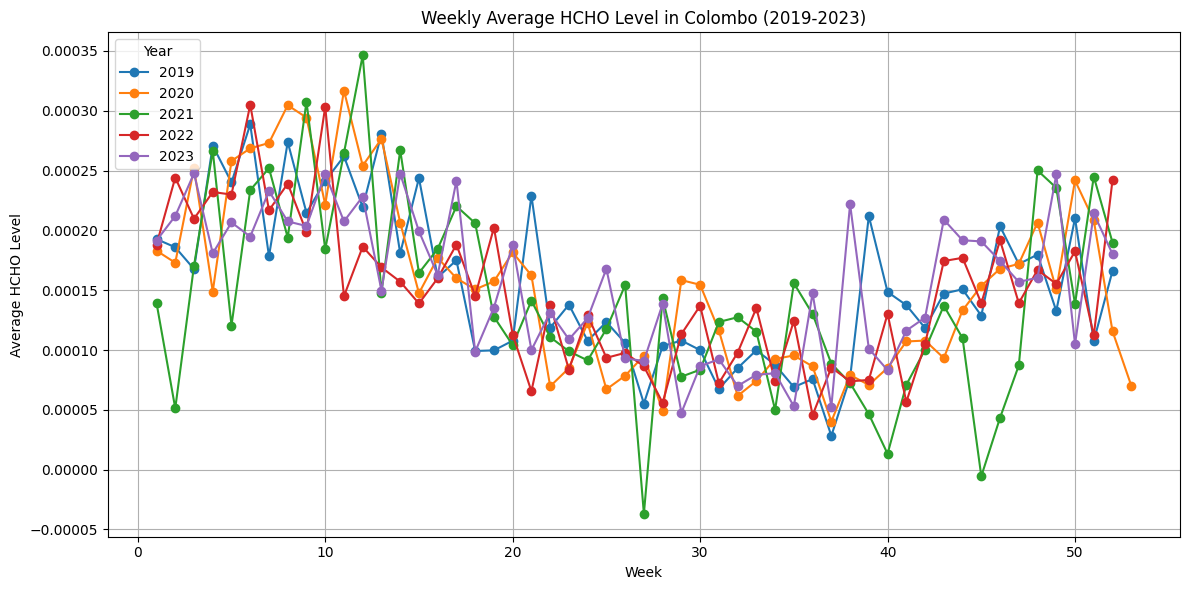

In [ ]:
plot_HCHO_average_vs_week(Colombo_Data, 'Colombo')

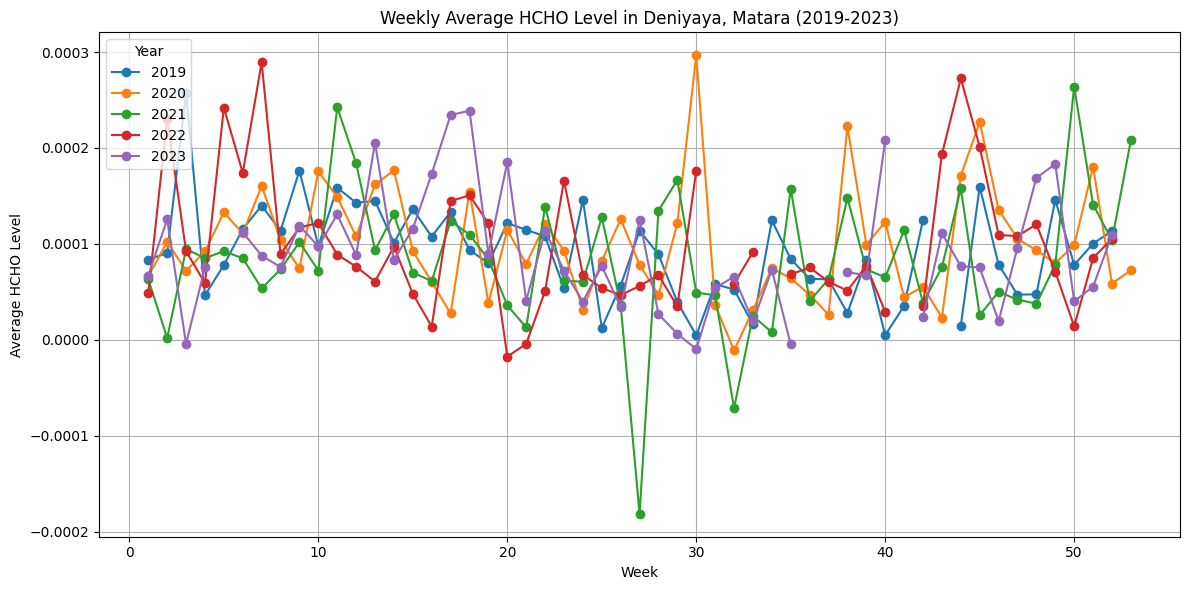

In [ ]:
plot_HCHO_average_vs_week(Deniyaya_Matara_Data, 'Deniyaya, Matara')

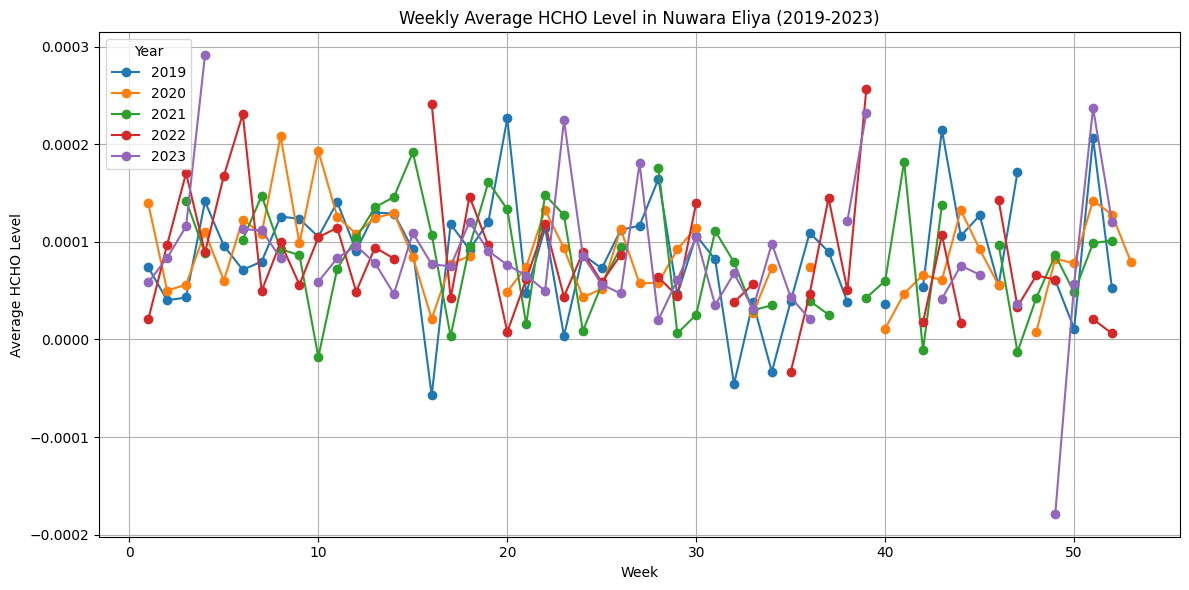

In [ ]:
plot_HCHO_average_vs_week(Nuwara_Eliya_Data, 'Nuwara Eliya')

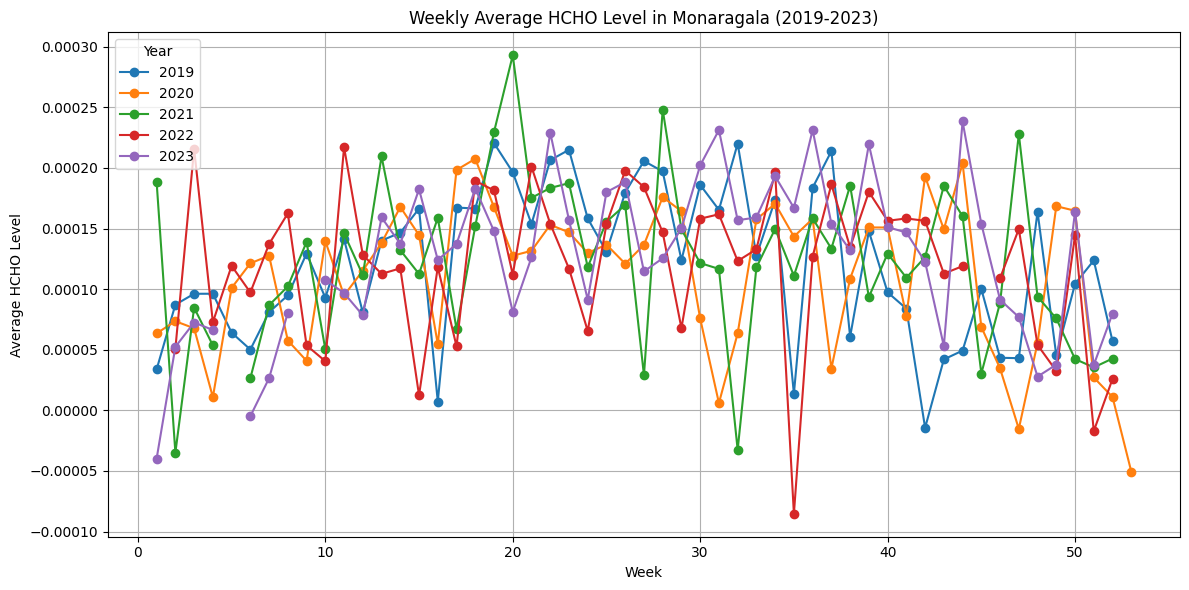

In [ ]:
plot_HCHO_average_vs_week(Monaragala_Data, 'Monaragala')

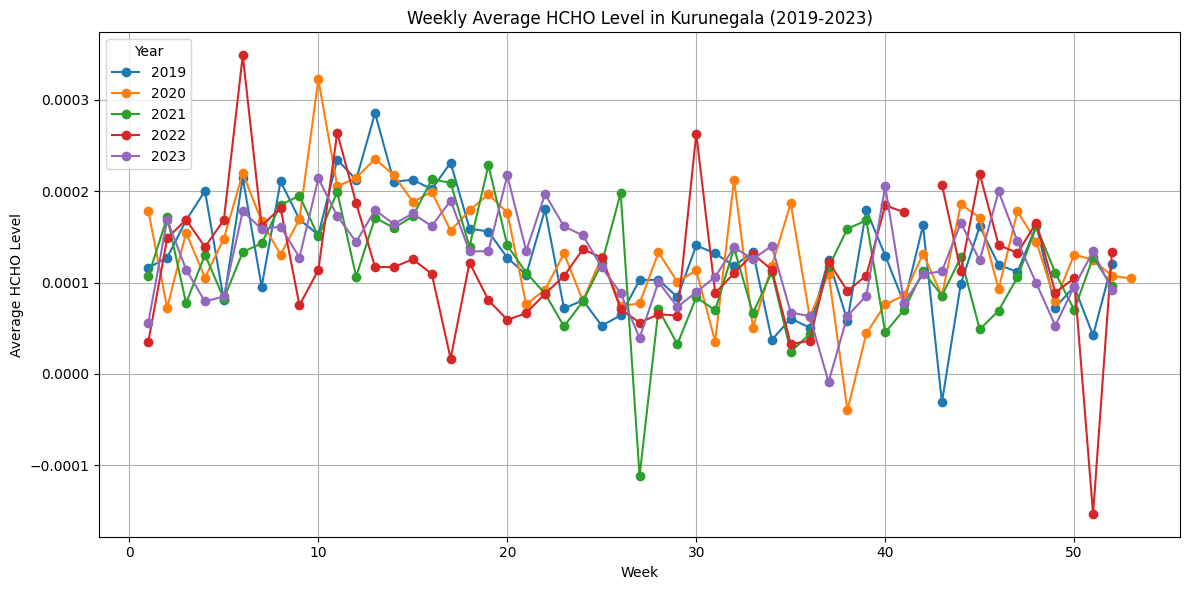

In [ ]:
plot_HCHO_average_vs_week(Kurunegala_Data, 'Kurunegala')

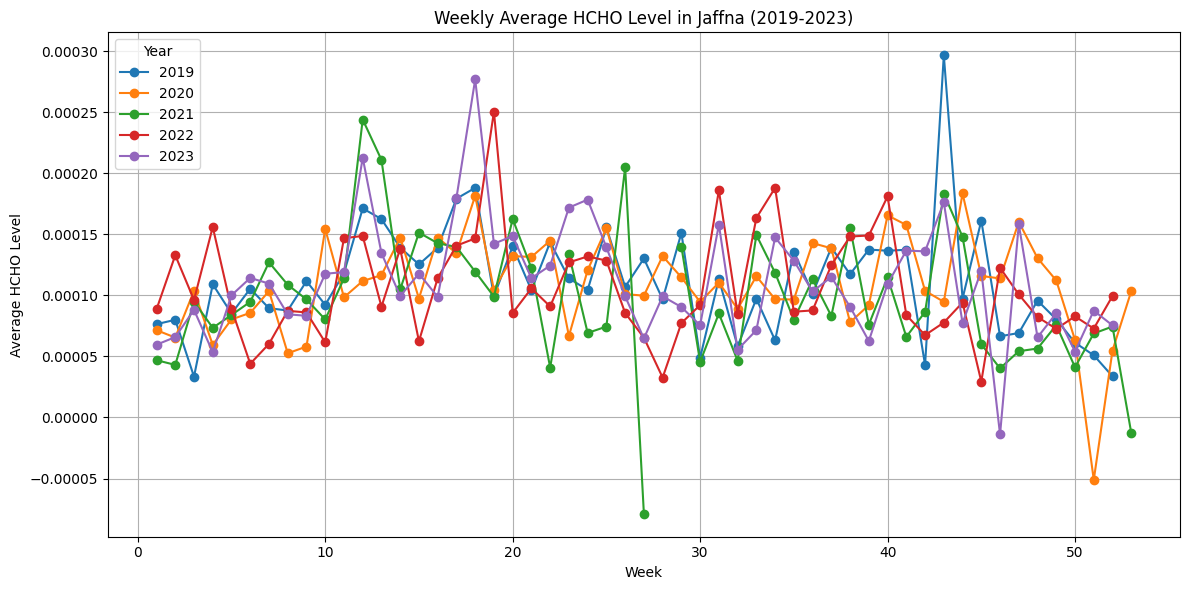

In [ ]:
plot_HCHO_average_vs_week(Jaffna_Data, 'Jaffna')

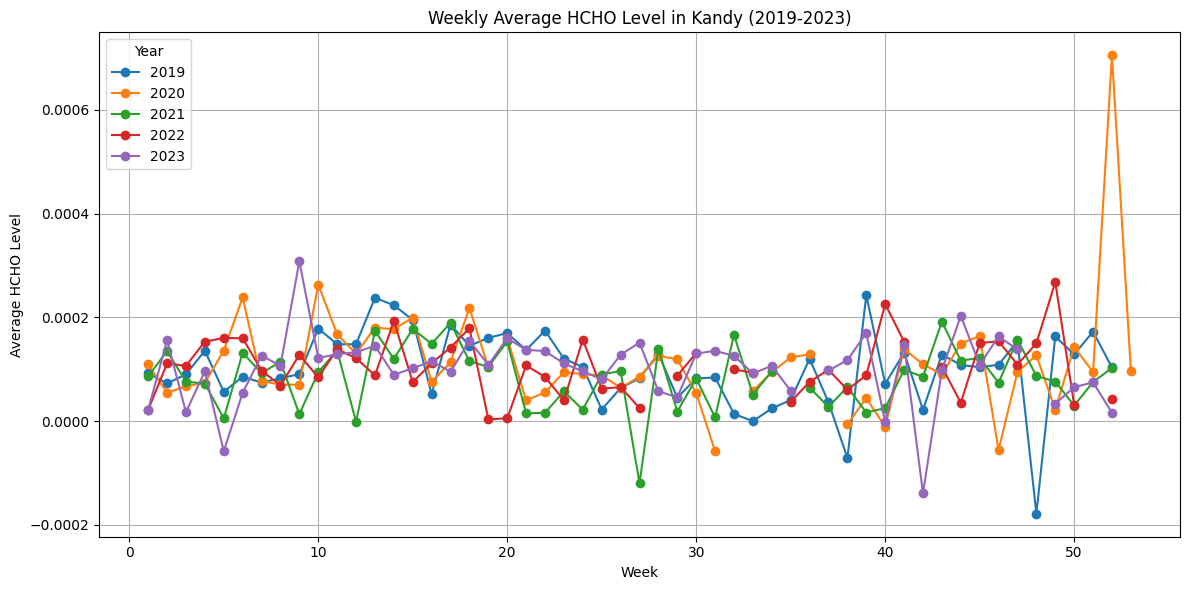

In [ ]:
plot_HCHO_average_vs_week(kan_data, 'Kandy')

##Looking for outliers

In [ ]:

def visualization_of_outliers(df, city):
    df_pd = df.toPandas()

    std = df_pd['HCHO reading'].std()
    print(f'Standard Deviation: {std}')

    df_pd.boxplot(column='HCHO reading', figsize=(10, 6))
    plt.title(f'Boxplot of HCHO Reading in {city}')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df_pd.index, df_pd['HCHO reading'], label='HCHO Reading', color='blue')

    outliers = df_pd[(df_pd['HCHO reading'] > std * 5) | (df_pd['HCHO reading'] < 0)]
    print(outliers)
    if not outliers.empty:
        plt.scatter(outliers.index, outliers['HCHO reading'], color='red', label='Outliers')

    plt.title(f'HCHO Reading vs Date in {city}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()




Standard Deviation: 9.92880161632085e-05


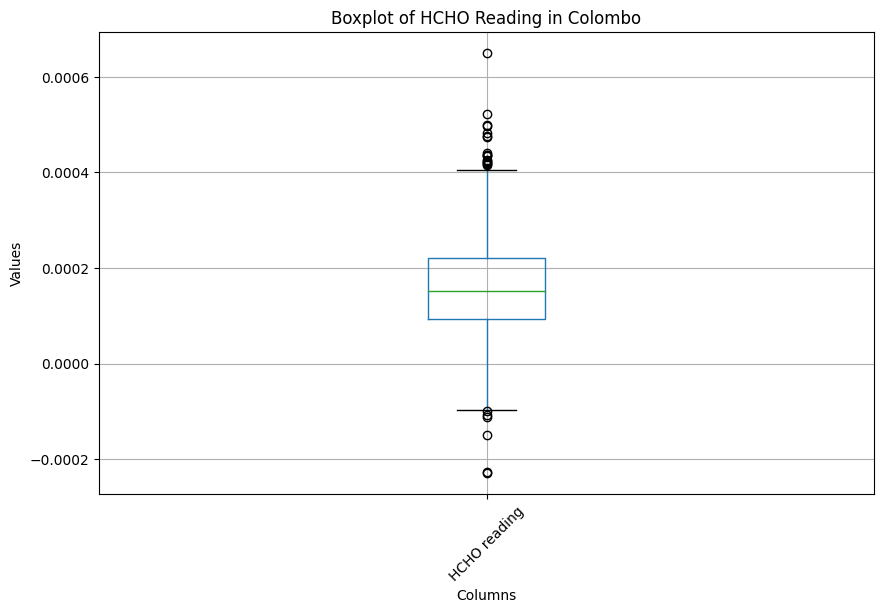

      HCHO reading        Location Current Date   Next Date
148  -2.056808e-05  Colombo Proper   2019-05-29  2019-05-30
176  -1.718883e-05  Colombo Proper   2019-06-26  2019-06-27
203  -1.036014e-05  Colombo Proper   2019-07-23  2019-07-24
215  -2.350630e-05  Colombo Proper   2019-08-04  2019-08-05
220  -3.753133e-05  Colombo Proper   2019-08-09  2019-08-10
241  -2.291026e-04  Colombo Proper   2019-08-30  2019-08-31
256  -2.707915e-05  Colombo Proper   2019-09-14  2019-09-15
257  -1.084998e-04  Colombo Proper   2019-09-15  2019-09-16
352  -4.637232e-05  Colombo Proper   2019-12-19  2019-12-20
516  -2.987382e-06  Colombo Proper   2020-05-31  2020-06-01
531  -3.856743e-06  Colombo Proper   2020-06-15  2020-06-16
551  -3.315853e-05  Colombo Proper   2020-07-05  2020-07-06
553  -1.853476e-05  Colombo Proper   2020-07-07  2020-07-08
601  -4.433698e-05  Colombo Proper   2020-08-24  2020-08-25
616  -2.856671e-05  Colombo Proper   2020-09-08  2020-09-09
617  -4.658729e-05  Colombo Proper   202

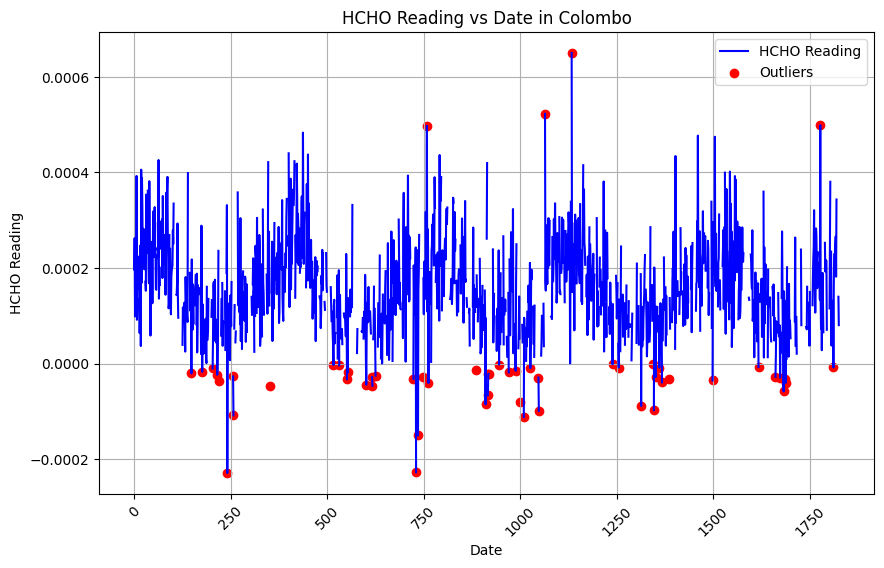

In [ ]:
visualization_of_outliers(Colombo_Data, 'Colombo')

Standard Deviation: 9.717767267758973e-05


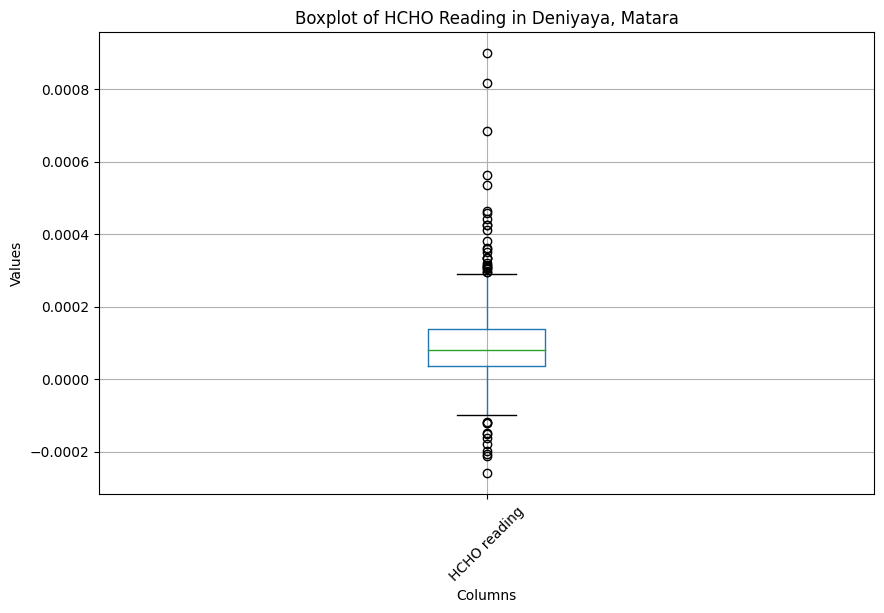

      HCHO reading          Location Current Date   Next Date
18        0.000900  Deniyaya, Matara   2019-01-19  2019-01-20
20       -0.000076  Deniyaya, Matara   2019-01-21  2019-01-22
32       -0.000001  Deniyaya, Matara   2019-02-02  2019-02-03
36       -0.000002  Deniyaya, Matara   2019-02-06  2019-02-07
44       -0.000120  Deniyaya, Matara   2019-02-14  2019-02-15
...            ...               ...          ...         ...
1759     -0.000015  Deniyaya, Matara   2023-10-26  2023-10-27
1774     -0.000068  Deniyaya, Matara   2023-11-10  2023-11-11
1779     -0.000018  Deniyaya, Matara   2023-11-15  2023-11-16
1782     -0.000034  Deniyaya, Matara   2023-11-18  2023-11-19
1807     -0.000012  Deniyaya, Matara   2023-12-13  2023-12-14

[120 rows x 4 columns]


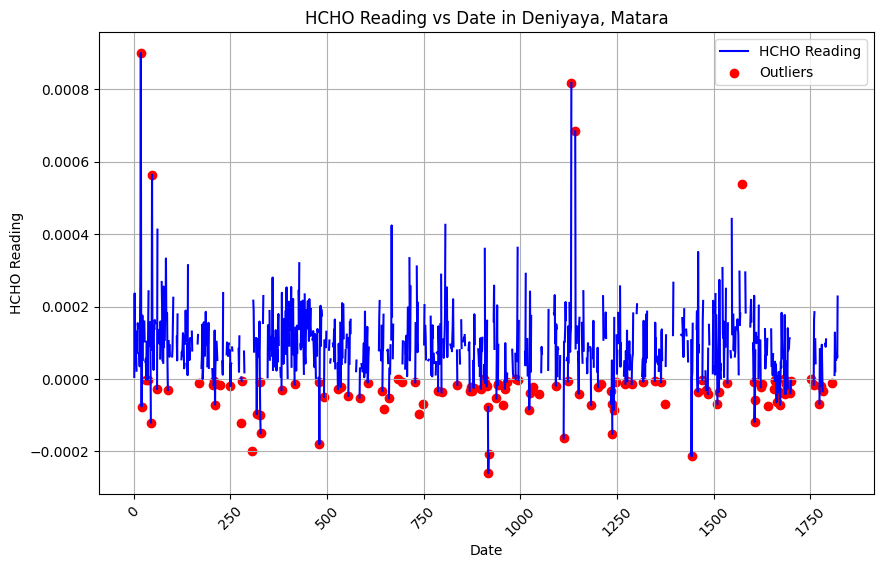

In [ ]:
visualization_of_outliers(Deniyaya_Matara_Data, 'Deniyaya, Matara')

Standard Deviation: 8.366257795578252e-05


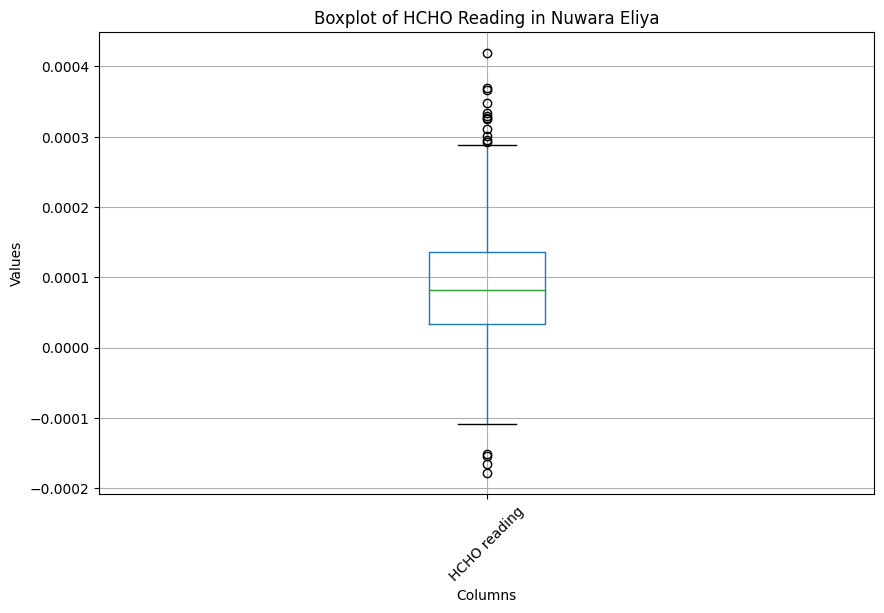

      HCHO reading             Location Current Date   Next Date
51       -0.000078  Nuwara Eliya Proper   2019-02-21  2019-02-22
52       -0.000025  Nuwara Eliya Proper   2019-02-22  2019-02-23
78       -0.000004  Nuwara Eliya Proper   2019-03-20  2019-03-21
100      -0.000030  Nuwara Eliya Proper   2019-04-11  2019-04-12
108      -0.000057  Nuwara Eliya Proper   2019-04-19  2019-04-20
...            ...                  ...          ...         ...
1684     -0.000072  Nuwara Eliya Proper   2023-08-12  2023-08-13
1687     -0.000030  Nuwara Eliya Proper   2023-08-15  2023-08-16
1690     -0.000045  Nuwara Eliya Proper   2023-08-18  2023-08-19
1759     -0.000029  Nuwara Eliya Proper   2023-10-26  2023-10-27
1804     -0.000179  Nuwara Eliya Proper   2023-12-10  2023-12-11

[97 rows x 4 columns]


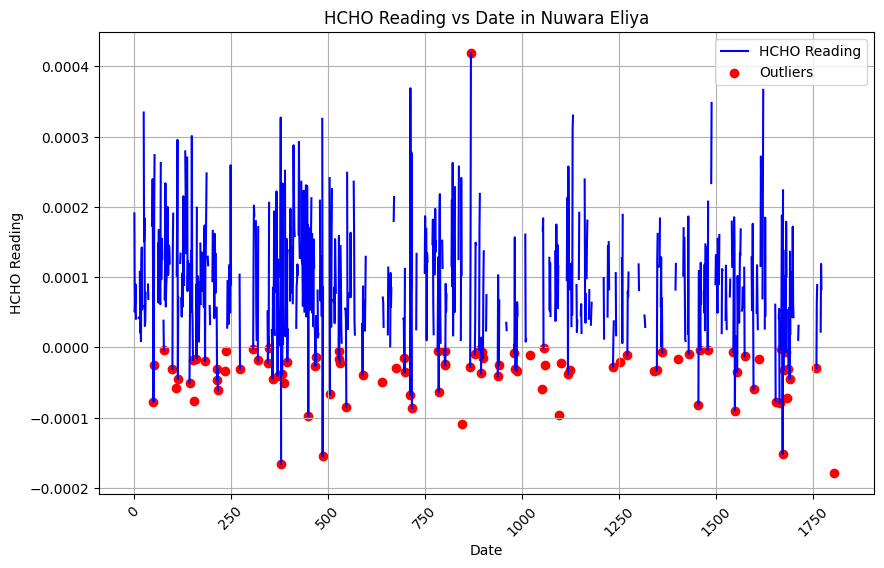

In [ ]:
visualization_of_outliers(Nuwara_Eliya_Data, 'Nuwara Eliya')

Standard Deviation: 9.402251427407125e-05


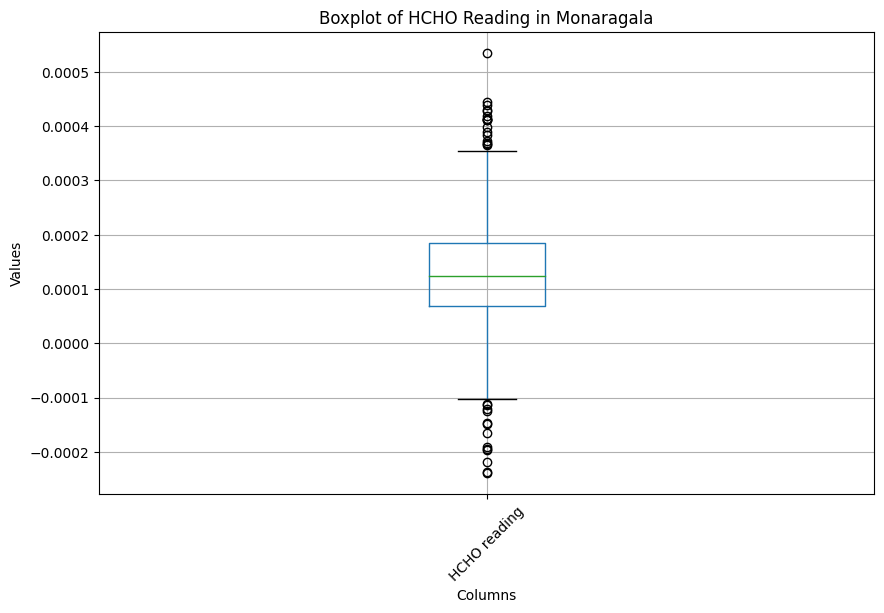

      HCHO reading            Location Current Date   Next Date
4        -0.000018  Bibile, Monaragala   2019-01-05  2019-01-06
24       -0.000029  Bibile, Monaragala   2019-01-25  2019-01-26
56       -0.000047  Bibile, Monaragala   2019-02-26  2019-02-27
81       -0.000015  Bibile, Monaragala   2019-03-23  2019-03-24
107      -0.000018  Bibile, Monaragala   2019-04-18  2019-04-19
...            ...                 ...          ...         ...
1783     -0.000038  Bibile, Monaragala   2023-11-19  2023-11-20
1786     -0.000083  Bibile, Monaragala   2023-11-22  2023-11-23
1804     -0.000196  Bibile, Monaragala   2023-12-10  2023-12-11
1814     -0.000043  Bibile, Monaragala   2023-12-20  2023-12-21
1815     -0.000008  Bibile, Monaragala   2023-12-21  2023-12-22

[80 rows x 4 columns]


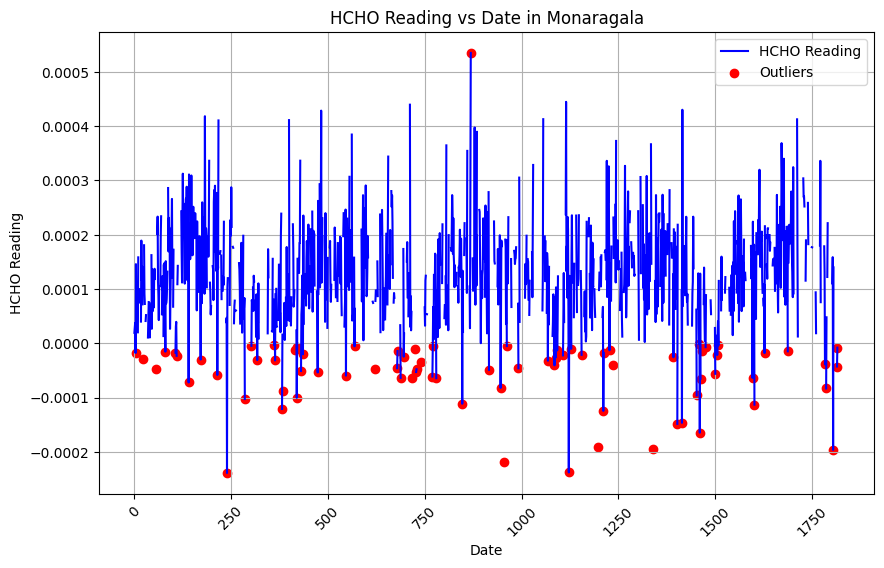

In [ ]:
visualization_of_outliers(Monaragala_Data, 'Monaragala')

Standard Deviation: 8.677375232539988e-05


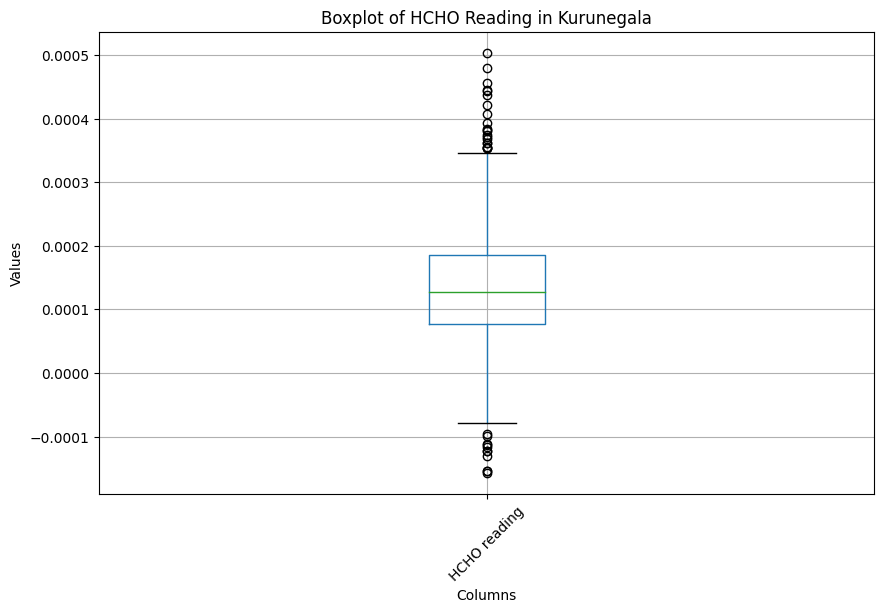

      HCHO reading           Location Current Date   Next Date
3        -0.000002  Kurunegala Proper   2019-01-04  2019-01-05
18        0.000443  Kurunegala Proper   2019-01-19  2019-01-20
33       -0.000037  Kurunegala Proper   2019-02-03  2019-02-04
85        0.000438  Kurunegala Proper   2019-03-27  2019-03-28
114       0.000479  Kurunegala Proper   2019-04-25  2019-04-26
...            ...                ...          ...         ...
1744     -0.000005  Kurunegala Proper   2023-10-11  2023-10-12
1762     -0.000003  Kurunegala Proper   2023-10-29  2023-10-30
1765      0.000456  Kurunegala Proper   2023-11-01  2023-11-02
1795     -0.000100  Kurunegala Proper   2023-12-01  2023-12-02
1799     -0.000038  Kurunegala Proper   2023-12-05  2023-12-06

[62 rows x 4 columns]


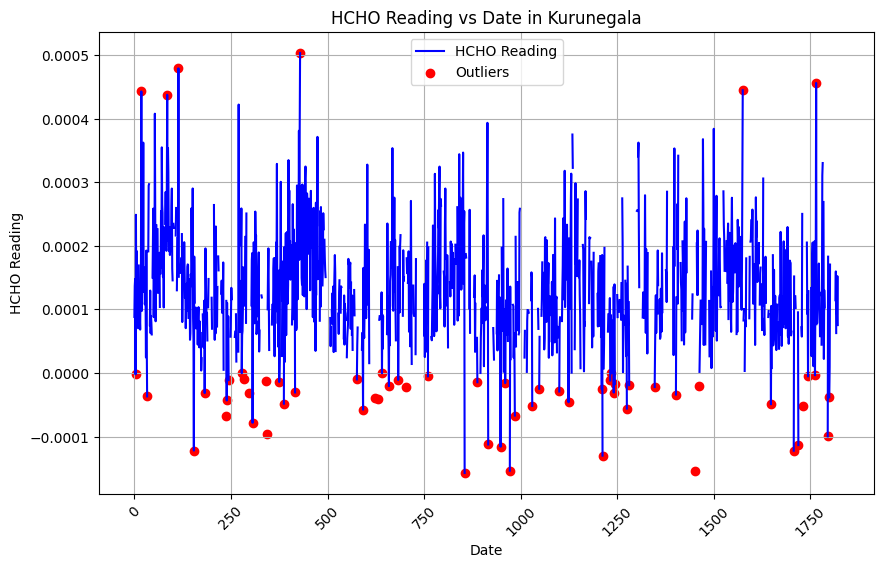

In [ ]:
visualization_of_outliers(Kurunegala_Data, 'Kurunegala')

Standard Deviation: 7.844332899390029e-05


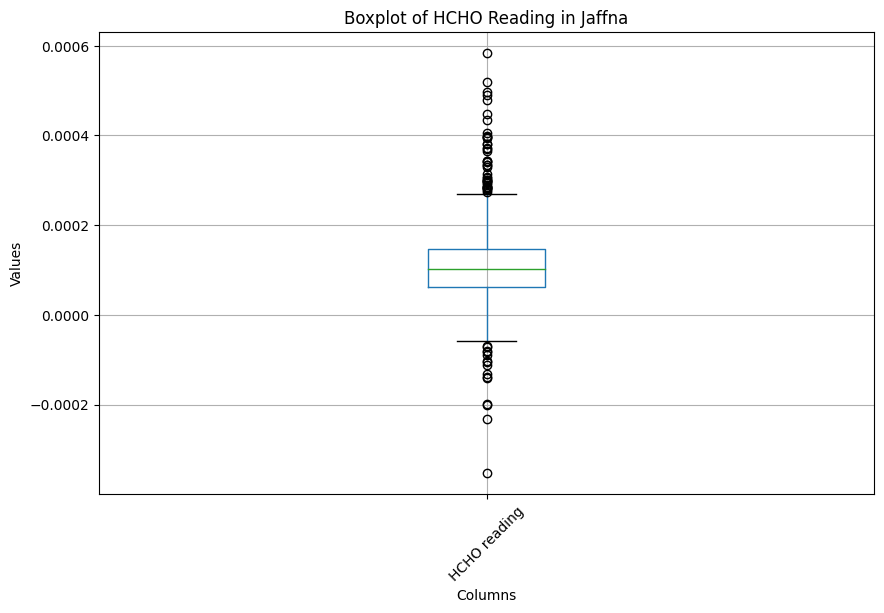

      HCHO reading       Location Current Date   Next Date
3    -2.383985e-06  Jaffna Proper   2019-01-04  2019-01-05
12   -4.157867e-05  Jaffna Proper   2019-01-13  2019-01-14
19   -5.276786e-05  Jaffna Proper   2019-01-20  2019-01-21
193  -2.341601e-05  Jaffna Proper   2019-07-13  2019-07-14
204  -3.688731e-05  Jaffna Proper   2019-07-24  2019-07-25
...            ...            ...          ...         ...
1683 -2.317791e-04  Jaffna Proper   2023-08-11  2023-08-12
1782 -1.111853e-04  Jaffna Proper   2023-11-18  2023-11-19
1791 -3.147969e-05  Jaffna Proper   2023-11-27  2023-11-28
1801 -2.239032e-05  Jaffna Proper   2023-12-07  2023-12-08
1820 -7.696313e-08  Jaffna Proper   2023-12-26  2023-12-27

[69 rows x 4 columns]


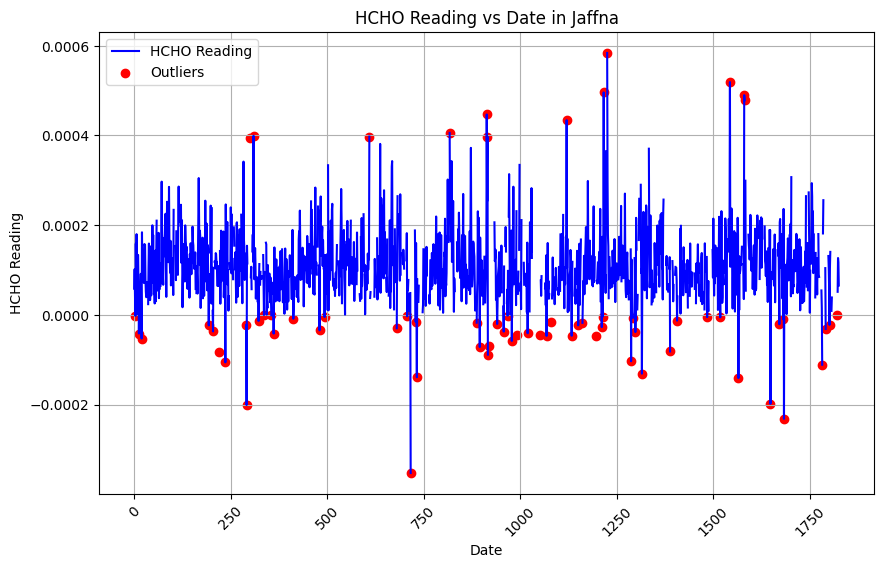

In [ ]:
visualization_of_outliers(Jaffna_Data, 'Jaffna')

Standard Deviation: 9.202571862518039e-05


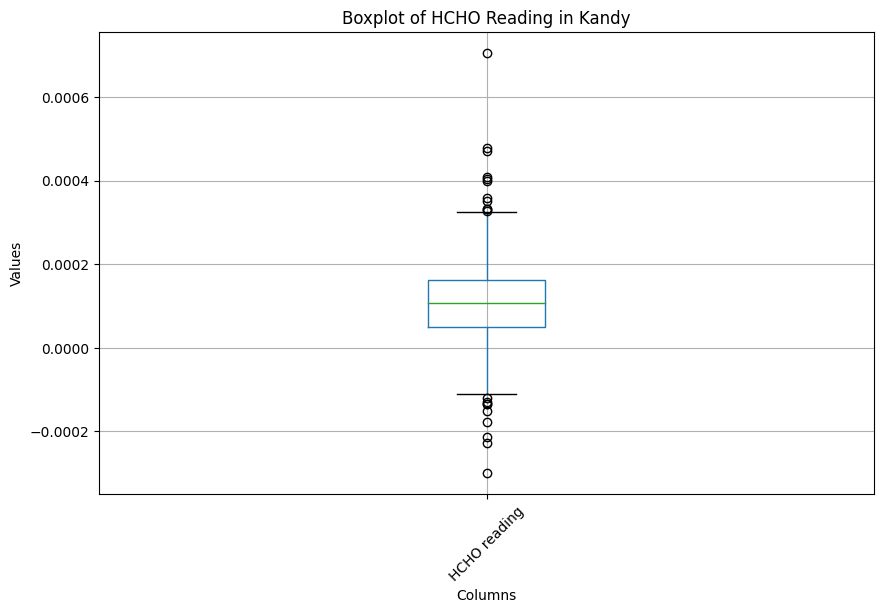

      HCHO reading      Location Current Date   Next Date
5        -0.000065  Kandy Proper   2019-01-06  2019-01-07
7        -0.000067  Kandy Proper   2019-01-08  2019-01-09
17       -0.000120  Kandy Proper   2019-01-18  2019-01-19
23       -0.000004  Kandy Proper   2019-01-24  2019-01-25
29       -0.000030  Kandy Proper   2019-01-30  2019-01-31
...            ...           ...          ...         ...
1754     -0.000300  Kandy Proper   2023-10-21  2023-10-22
1802     -0.000090  Kandy Proper   2023-12-08  2023-12-09
1807     -0.000030  Kandy Proper   2023-12-13  2023-12-14
1811     -0.000035  Kandy Proper   2023-12-17  2023-12-18
1816     -0.000007  Kandy Proper   2023-12-22  2023-12-23

[111 rows x 4 columns]


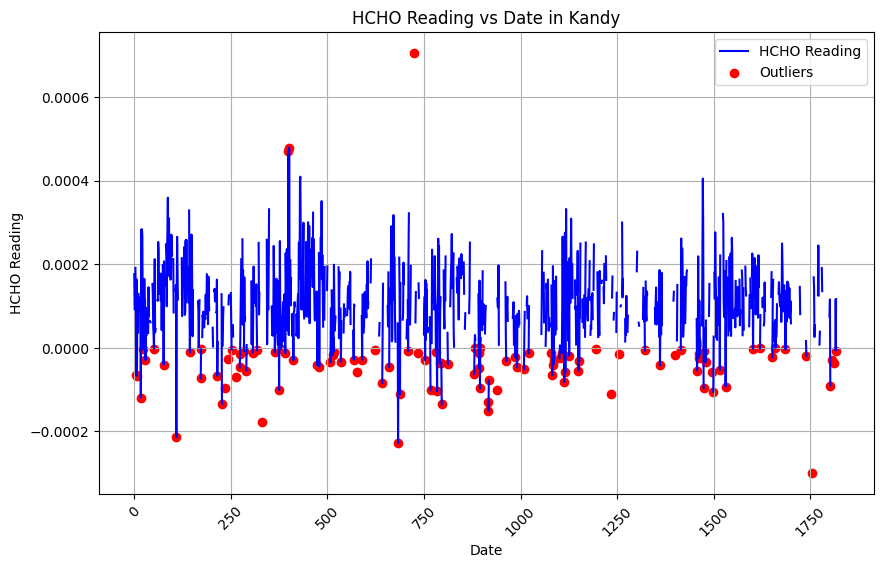

In [ ]:
visualization_of_outliers(kan_data, 'Kandy')

##Handline Outliers

In [ ]:

Colombo_Data_positive = Colombo_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Deniyaya_Matara_Data_positive = Deniyaya_Matara_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Nuwara_Eliya_Data_positive = Nuwara_Eliya_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Monaragala_Data_positive = Monaragala_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Kurunegala_Data_positive = Kurunegala_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Jaffna_Data_positive = Jaffna_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
kan_data_positive = kan_data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))


In [ ]:
def replace_outliers(df, city):
    print(f'City: {city}')
    df_pd = df.toPandas()

    std = df_pd['HCHO reading'].std()
    print(f'Standard Deviation: {std}')

    outliers_mask = df_pd['HCHO reading'] > std * 5

    df_pd.loc[outliers_mask, 'HCHO reading'] = std * 5

    replaced_outliers = df_pd[outliers_mask]
    if not replaced_outliers.empty:
        print('Replaced outliers:')
        print(replaced_outliers)
    else:
        print('No outliers to replace.')

    df = spark.createDataFrame(df_pd)

    return df



In [ ]:
Colombo_Data_cleaned = replace_outliers(Colombo_Data_positive, 'Colombo')

City: Colombo
Standard Deviation: 9.557078122530406e-05
Replaced outliers:
      HCHO reading        Location Current Date   Next Date
437       0.000478  Colombo Proper   2020-03-13  2020-03-14
758       0.000478  Colombo Proper   2021-01-28  2021-01-29
1064      0.000478  Colombo Proper   2021-11-30  2021-12-01
1133      0.000478  Colombo Proper   2022-02-07  2022-02-08
1777      0.000478  Colombo Proper   2023-11-13  2023-11-14


In [ ]:
Colombo_Data_positive_pd = Colombo_Data_cleaned.toPandas()

outliers = Colombo_Data_positive_pd[Colombo_Data_positive_pd['HCHO reading']>0.000478]
print(outliers)


Empty DataFrame
Columns: [HCHO reading, Location, Current Date, Next Date]
Index: []


In [ ]:
Deniyaya_Matara_Data_cleaned = replace_outliers(Deniyaya_Matara_Data_positive, 'Matara')
Nuwara_Eliya_Data_cleaned = replace_outliers(Nuwara_Eliya_Data_positive, 'Nuwara Eliya')
Monaragala_Data_cleaned = replace_outliers(Monaragala_Data_positive, 'Monaragala')
Kurunegala_Data_cleaned = replace_outliers(Kurunegala_Data_positive, 'Kurunegala')
Jaffna_Data_cleaned = replace_outliers(Jaffna_Data_positive, 'Jaffna')
kan_data_cleaned = replace_outliers(kan_data_positive, 'Kandy')

City: Matara
Standard Deviation: 8.907257691906407e-05
Replaced outliers:
      HCHO reading          Location Current Date   Next Date
18        0.000445  Deniyaya, Matara   2019-01-19  2019-01-20
47        0.000445  Deniyaya, Matara   2019-02-17  2019-02-18
567       0.000445  Deniyaya, Matara   2020-07-21  2020-07-22
1132      0.000445  Deniyaya, Matara   2022-02-06  2022-02-07
1142      0.000445  Deniyaya, Matara   2022-02-16  2022-02-17
1405      0.000445  Deniyaya, Matara   2022-11-06  2022-11-07
1574      0.000445  Deniyaya, Matara   2023-04-24  2023-04-25
City: Nuwara Eliya
Standard Deviation: 7.55745369389659e-05
Replaced outliers:
     HCHO reading             Location Current Date   Next Date
869      0.000378  Nuwara Eliya Proper   2021-05-19  2021-05-20
City: Monaragala
Standard Deviation: 8.555707534746206e-05
Replaced outliers:
      HCHO reading            Location Current Date   Next Date
483       0.000428  Bibile, Monaragala   2020-04-28  2020-04-29
712       0.00042

In [ ]:
row_count = Colombo_Data_cleaned.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


##Handling null values using the mean

In [ ]:
Colombo_Data.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [ ]:

Deniyaya_Matara_Data_with_month = Deniyaya_Matara_Data_cleaned.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Nuwara_Eliya_Data_with_month = Nuwara_Eliya_Data_cleaned.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Monaragala_Data_with_month = Monaragala_Data_cleaned.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Kurunegala_Data_with_month = Kurunegala_Data_cleaned.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Jaffna_Data_with_month = Jaffna_Data_cleaned.withColumn("month", date_format('Current Date', 'yyyy-MM'))
kan_data_with_month = kan_data_cleaned.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Colombo_Data_with_month = Colombo_Data_cleaned.withColumn("month", date_format('Current Date', 'yyyy-MM'))

Colombo_Data_with_month.show()

+--------------------+--------------+------------+----------+-------+
|        HCHO reading|      Location|Current Date| Next Date|  month|
+--------------------+--------------+------------+----------+-------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|2019-01|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|2019-01|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|2019-01|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|2019-01|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|2019-01|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|2019-01|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|2019-01|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|2019-01|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|2019-01|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|2019-01|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|2019-01|
|1.569418094178759..

In [ ]:
Colombo_Data_with_month_pd = Colombo_Data_with_month.toPandas()
outliers = Colombo_Data_with_month_pd[Colombo_Data_with_month_pd['HCHO reading']>0.000477]
print(outliers)

      HCHO reading        Location Current Date   Next Date    month
437       0.000478  Colombo Proper   2020-03-13  2020-03-14  2020-03
758       0.000478  Colombo Proper   2021-01-28  2021-01-29  2021-01
1064      0.000478  Colombo Proper   2021-11-30  2021-12-01  2021-11
1133      0.000478  Colombo Proper   2022-02-07  2022-02-08  2022-02
1460      0.000477  Colombo Proper   2022-12-31  2023-01-01  2022-12
1777      0.000478  Colombo Proper   2023-11-13  2023-11-14  2023-11


In [ ]:
row_count = Colombo_Data_with_month.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


In [ ]:

def find_null_indexes(df):
    df_pandas = df.toPandas()

    null_indexes = df_pandas[df_pandas['HCHO reading'].isnull()].index.tolist()

    return null_indexes




In [ ]:
null_indexes = find_null_indexes(Colombo_Data_with_month)
print(null_indexes)

[12, 28, 34, 44, 59, 60, 67, 76, 79, 92, 103, 104, 105, 106, 108, 115, 116, 117, 118, 119, 121, 122, 124, 140, 141, 143, 155, 156, 157, 160, 166, 170, 171, 189, 193, 194, 195, 197, 198, 199, 202, 213, 219, 221, 223, 224, 227, 233, 234, 237, 238, 253, 254, 255, 258, 261, 264, 265, 266, 267, 278, 283, 284, 293, 294, 296, 297, 298, 299, 300, 302, 303, 306, 312, 316, 328, 332, 337, 338, 340, 342, 348, 351, 353, 355, 364, 380, 396, 399, 412, 416, 428, 442, 443, 444, 460, 476, 477, 479, 490, 491, 492, 495, 496, 500, 501, 502, 504, 506, 508, 512, 522, 523, 524, 528, 532, 537, 540, 541, 542, 545, 555, 556, 557, 558, 562, 566, 568, 570, 571, 572, 574, 575, 576, 579, 580, 581, 582, 583, 584, 586, 587, 588, 593, 609, 610, 614, 615, 618, 622, 626, 628, 629, 630, 633, 637, 638, 645, 646, 647, 652, 653, 668, 684, 691, 693, 694, 700, 701, 716, 718, 719, 720, 721, 722, 731, 732, 733, 739, 740, 741, 742, 743, 745, 746, 748, 764, 768, 780, 796, 809, 812, 814, 815, 816, 817, 828, 833, 837, 843, 844, 860,

In [ ]:
def replace_null_with_mean(df):
    df_pd = df.toPandas()

    monthly_avg = df_pd.groupby('month')['HCHO reading'].mean()

    monthly_avg_dict = monthly_avg.to_dict()
    print(monthly_avg_dict)
    for index, row in df_pd.iterrows():
        if pd.isnull(row['HCHO reading']):
            month_value = row['month']
            monthly_average = monthly_avg_dict.get(month_value, "None")
            if monthly_average is not None:
                df_pd.at[index, 'HCHO reading'] = monthly_average

    df = spark.createDataFrame(df_pd)

    return df



In [ ]:
Colombo_Data_mean_filled = replace_null_with_mean(Colombo_Data_with_month)
Colombo_Data_mean_filled.show()

{'2019-01': 0.00020067234434561178, '2019-02': 0.00024465589719447034, '2019-03': 0.00025530244914825055, '2019-04': 0.0001963118698358206, '2019-05': 0.00012726928470365432, '2019-06': 0.00011751318352280973, '2019-07': 8.908498320128199e-05, '2019-08': 9.408620964017814e-05, '2019-09': 9.779057421113491e-05, '2019-10': 0.0001398567434949973, '2019-11': 0.00016662975476992105, '2019-12': 0.00016753984282003858, '2020-01': 0.00019876633847429925, '2020-02': 0.000283339792700004, '2020-03': 0.00026614654462588767, '2020-04': 0.00016330611728223728, '2020-05': 0.00013916562296783478, '2020-06': 8.963693666389741e-05, '2020-07': 0.00012258767304708054, '2020-08': 8.956990094803839e-05, '2020-09': 8.132172176887851e-05, '2020-10': 9.927496765639288e-05, '2020-11': 0.00016984049844110985, '2020-12': 0.00018049469178980386, '2021-01': 0.0001923281099739509, '2021-02': 0.00020596513546758933, '2021-03': 0.00024324759699486756, '2021-04': 0.00019974147343172814, '2021-05': 0.000164186894038356

In [ ]:

filtered_rows = Colombo_Data_mean_filled.filter(col('Current Date').isin(null_indexes))

filtered_rows.show()

+------------+--------+------------+---------+-----+
|HCHO reading|Location|Current Date|Next Date|month|
+------------+--------+------------+---------+-----+
+------------+--------+------------+---------+-----+



In [ ]:
row_count = Colombo_Data_mean_filled.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


In [ ]:
kan_data_with_month.show()

+--------------------+------------+------------+----------+-------+
|        HCHO reading|    Location|Current Date| Next Date|  month|
+--------------------+------------+------------+----------+-------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|2019-01|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|2019-01|
|                 NaN|Kandy Proper|  2019-01-03|2019-01-04|2019-01|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|2019-01|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|2019-01|
|                 0.0|Kandy Proper|  2019-01-06|2019-01-07|2019-01|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|2019-01|
|                 0.0|Kandy Proper|  2019-01-08|2019-01-09|2019-01|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|2019-01|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|2019-01|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|2019-01|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|

In [ ]:
kan_data_mean_filled = replace_null_with_mean(kan_data_with_month)


{'2019-01': 0.0001054641264283859, '2019-02': 7.665479220546993e-05, '2019-03': 0.00017685150249636006, '2019-04': 0.000184576363342533, '2019-05': 0.00016615487488613455, '2019-06': 7.369806716272925e-05, '2019-07': 9.825814265590092e-05, '2019-08': 5.832937383089453e-05, '2019-09': 9.356501554813624e-05, '2019-10': 9.764926768833985e-05, '2019-11': 0.0001043349554086476, '2019-12': 0.0001244178360343577, '2020-01': 9.267363284727418e-05, '2020-02': 0.00011560892816243854, '2020-03': 0.0001770287912238182, '2020-04': 0.0001689624368465538, '2020-05': 0.00010159161880474305, '2020-06': 8.632789604034281e-05, '2020-07': 9.171840635030558e-05, '2020-08': 9.506138584866076e-05, '2020-09': 9.115557732562497e-05, '2020-10': 0.0001179519529642504, '2020-11': 0.00011705277647609234, '2020-12': 0.0001301430047019797, '2021-01': 8.334667678653279e-05, '2021-02': 0.00010619367469051336, '2021-03': 8.775680664490234e-05, '2021-04': 0.00016457182350465395, '2021-05': 0.00010187795186713154, '2021-

In [ ]:
kan_data_mean_filled.show()

+--------------------+------------+------------+----------+-------+
|        HCHO reading|    Location|Current Date| Next Date|  month|
+--------------------+------------+------------+----------+-------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|2019-01|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|2019-01|
|1.054641264283859E-4|Kandy Proper|  2019-01-03|2019-01-04|2019-01|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|2019-01|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|2019-01|
|                 0.0|Kandy Proper|  2019-01-06|2019-01-07|2019-01|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|2019-01|
|                 0.0|Kandy Proper|  2019-01-08|2019-01-09|2019-01|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|2019-01|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|2019-01|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|2019-01|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|

In [ ]:
# Replace null values with the mean for other months
Deniyaya_Matara_Data_mean_filled = replace_null_with_mean(Deniyaya_Matara_Data_with_month)
Nuwara_Eliya_Data_mean_filled = replace_null_with_mean(Nuwara_Eliya_Data_with_month)
Monaragala_Data_mean_filled = replace_null_with_mean(Monaragala_Data_with_month)
Kurunegala_Data_mean_filled = replace_null_with_mean(Kurunegala_Data_with_month)
Jaffna_Data_mean_filled = replace_null_with_mean(Jaffna_Data_with_month)


{'2019-01': 0.00011331254972133527, '2019-02': 0.00011725481919567545, '2019-03': 0.00014573666164880052, '2019-04': 0.000121837858872492, '2019-05': 0.00010324495040482696, '2019-06': 7.641431947704503e-05, '2019-07': 7.014245173146272e-05, '2019-08': 7.670277839439356e-05, '2019-09': 6.010495598722345e-05, '2019-10': 8.470007599303798e-05, '2019-11': 8.535037085675945e-05, '2019-12': 0.00010186634137790394, '2020-01': 9.495799159268632e-05, '2020-02': 0.00011236976186722883, '2020-03': 0.0001512248301401548, '2020-04': 9.787041845128074e-05, '2020-05': 9.61580988187084e-05, '2020-06': 8.440857401714741e-05, '2020-07': 0.00010679444145091751, '2020-08': 5.689438009875008e-05, '2020-09': 0.0001099687787608274, '2020-10': 8.745328315419271e-05, '2020-11': 0.00012582299551593042, '2020-12': 0.00010929972491483832, '2021-01': 0.00010993969365453517, '2021-02': 7.619449595347192e-05, '2021-03': 0.00013940006850475837, '2021-04': 9.984137722932644e-05, '2021-05': 7.510313920636118e-05, '202

In [ ]:
null_values_per_column(Colombo_Data_mean_filled, 'Colombo')


no null values
no null values
no null values
no null values
no null values


In [ ]:
null_values_per_column(kan_data_mean_filled, 'Knandy')

no null values
no null values
no null values
no null values
no null values


In [ ]:
Colombo_Data_mean_filled_pd = Colombo_Data_mean_filled.toPandas()
Deniyaya_Matara_Data_mean_filled_pd = Deniyaya_Matara_Data_mean_filled.toPandas()
Nuwara_Eliya_Data_mean_filled_pd = Nuwara_Eliya_Data_mean_filled.toPandas()
Monaragala_Data_mean_filled_pd = Monaragala_Data_mean_filled.toPandas()
Kurunegala_Data_mean_filled_pd = Kurunegala_Data_mean_filled.toPandas()
Jaffna_Data_mean_filled_pd = Jaffna_Data_mean_filled.toPandas()
kan_data_mean_filled_pd = kan_data_mean_filled.toPandas()

In [ ]:
Colombo_Data_mean_filled_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/colombo_preprocessed_data.csv', index=False)
Deniyaya_Matara_Data_mean_filled_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/matara_preprocessed_data.csv', index=False)
Nuwara_Eliya_Data_mean_filled_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/nuwara_preprocessed_data.csv', index=False)
Monaragala_Data_mean_filled_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/monaragala_preprocessed_data.csv', index=False)
Kurunegala_Data_mean_filled_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/kurunegala_preprocessed_data.csv', index=False)
Jaffna_Data_mean_filled_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/jaffna_preprocessed_data.csv', index=False)
kan_data_mean_filled_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/kandy_preprocessed_data.csv', index=False)

##Plot of HCHO Avg per week after handling outliers and null values

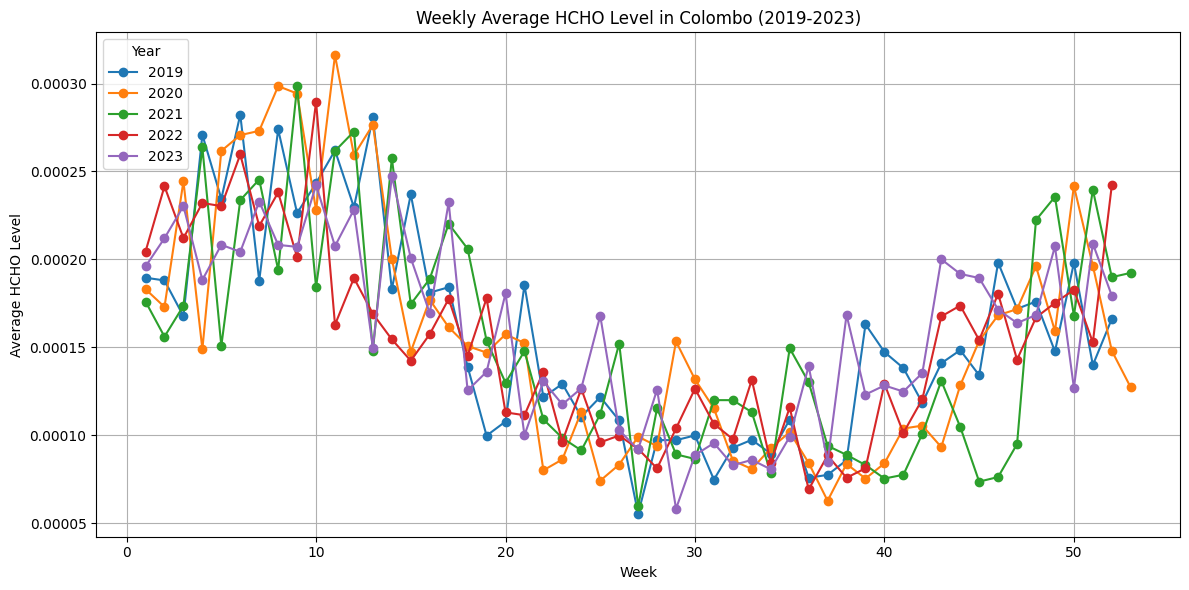

In [ ]:
plot_HCHO_average_vs_week(Colombo_Data_mean_filled, 'Colombo')

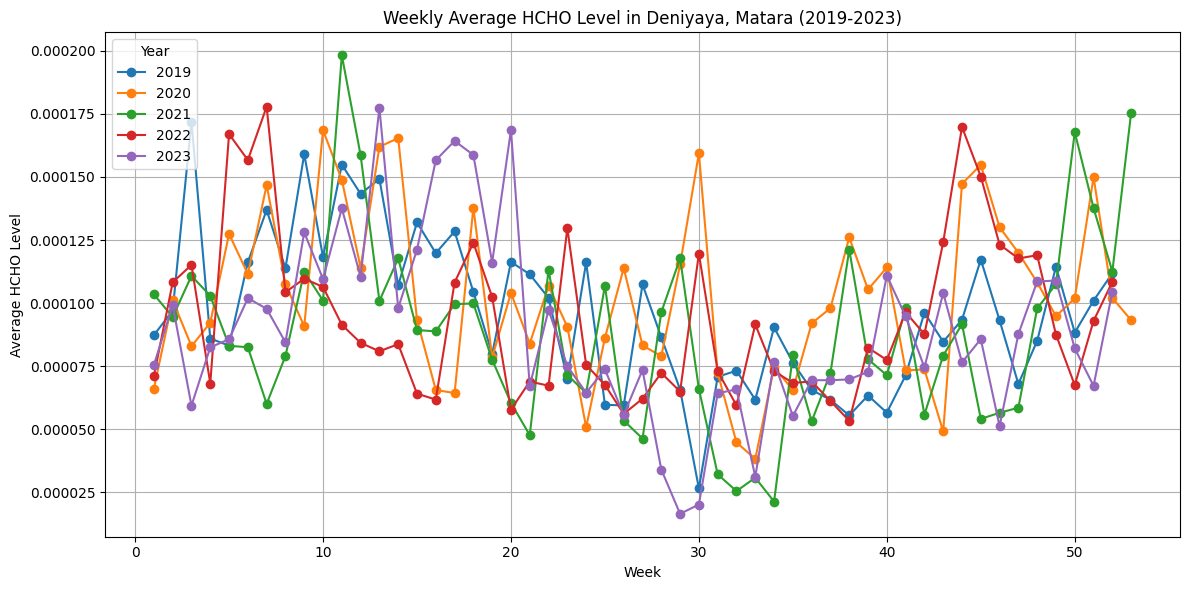

In [ ]:
plot_HCHO_average_vs_week(Deniyaya_Matara_Data_mean_filled, 'Deniyaya, Matara')

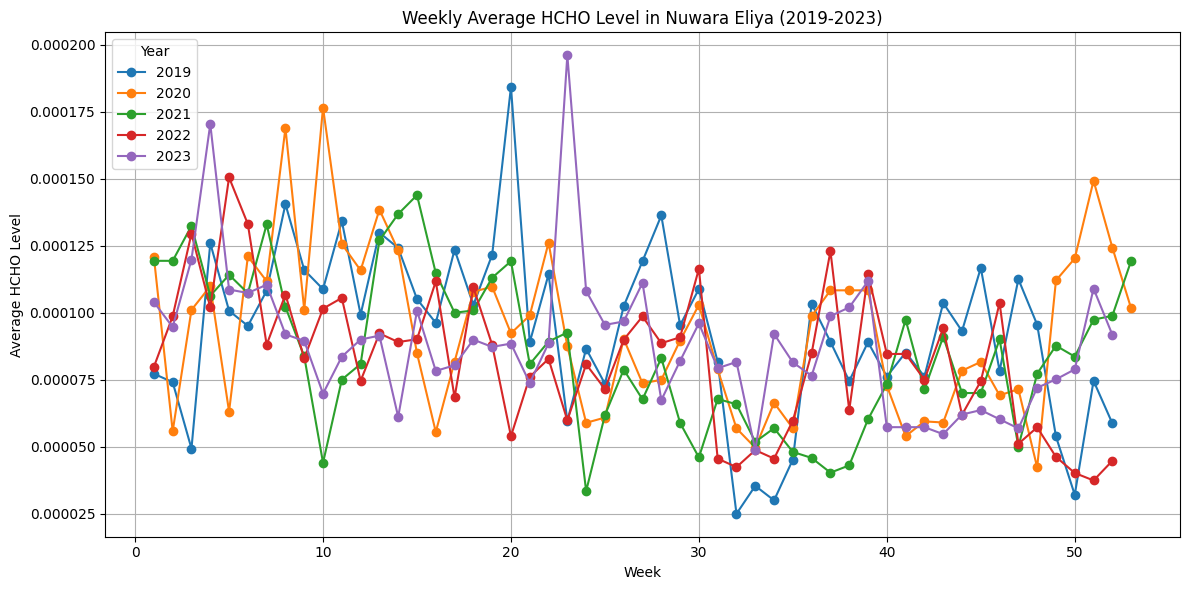

In [ ]:
plot_HCHO_average_vs_week(Nuwara_Eliya_Data_mean_filled, 'Nuwara Eliya')

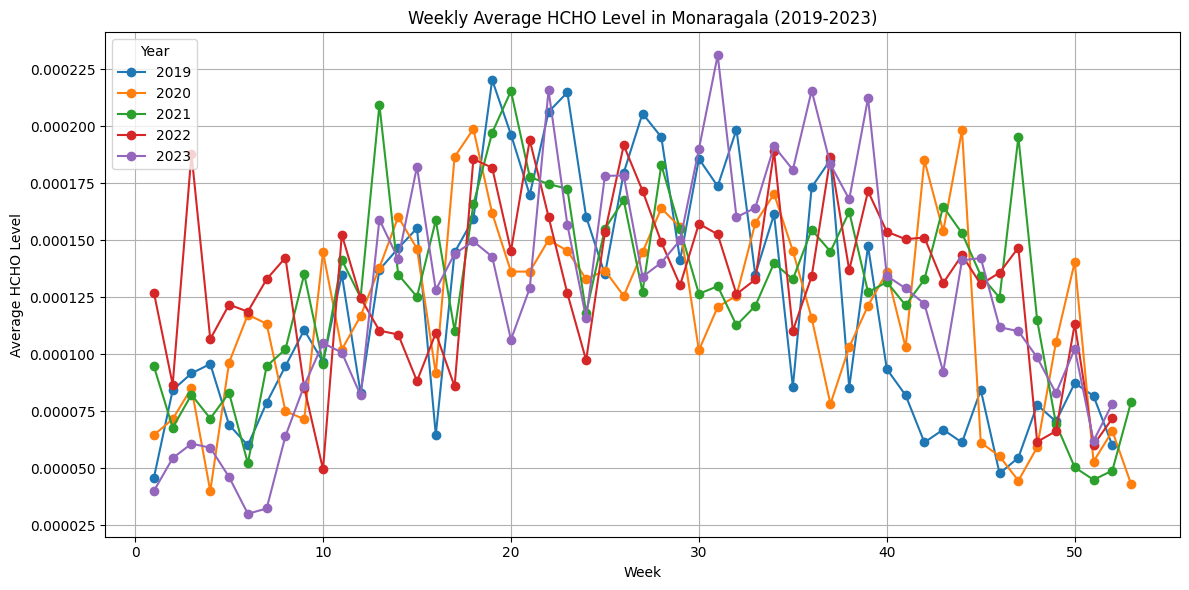

In [ ]:
plot_HCHO_average_vs_week(Monaragala_Data_mean_filled, 'Monaragala')

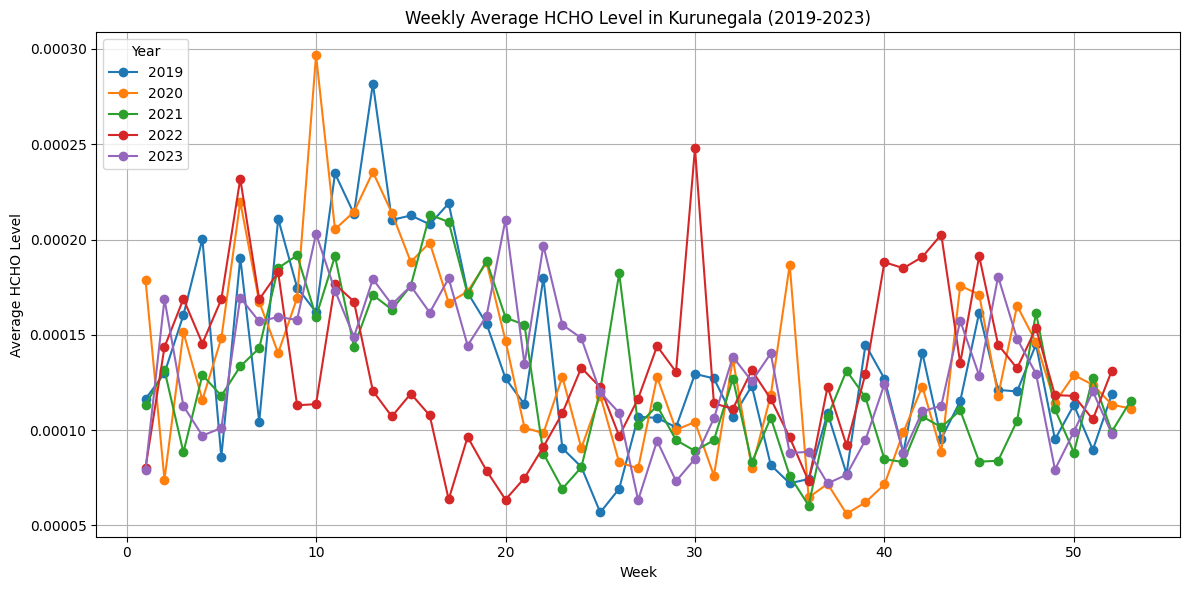

In [ ]:
plot_HCHO_average_vs_week(Kurunegala_Data_mean_filled, 'Kurunegala')

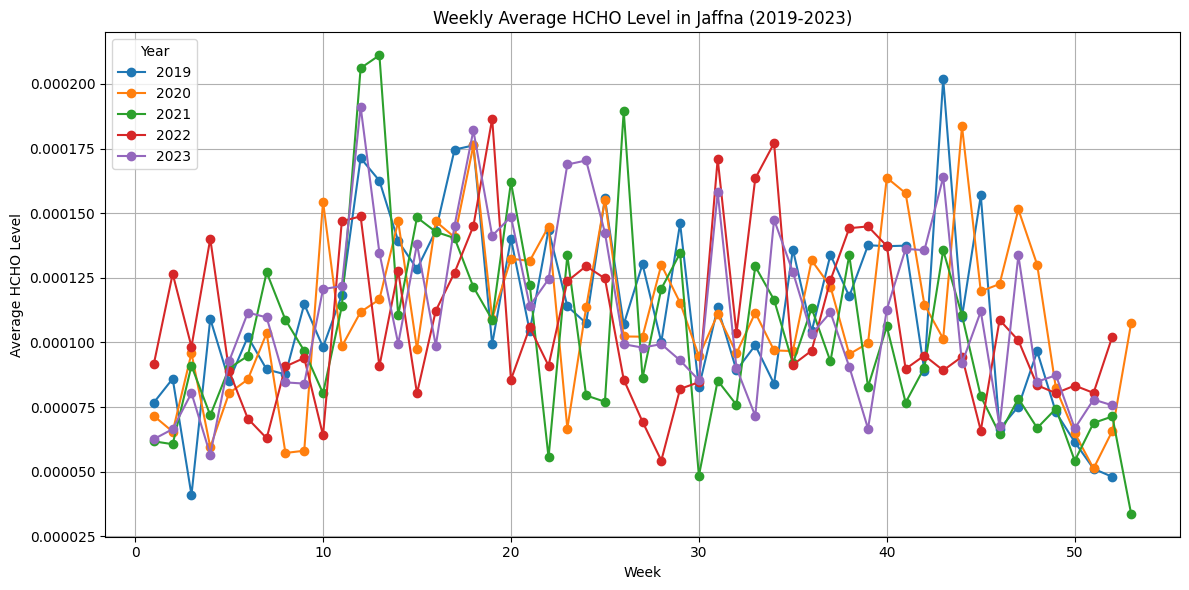

In [ ]:
plot_HCHO_average_vs_week(Jaffna_Data_mean_filled, 'Jaffna')

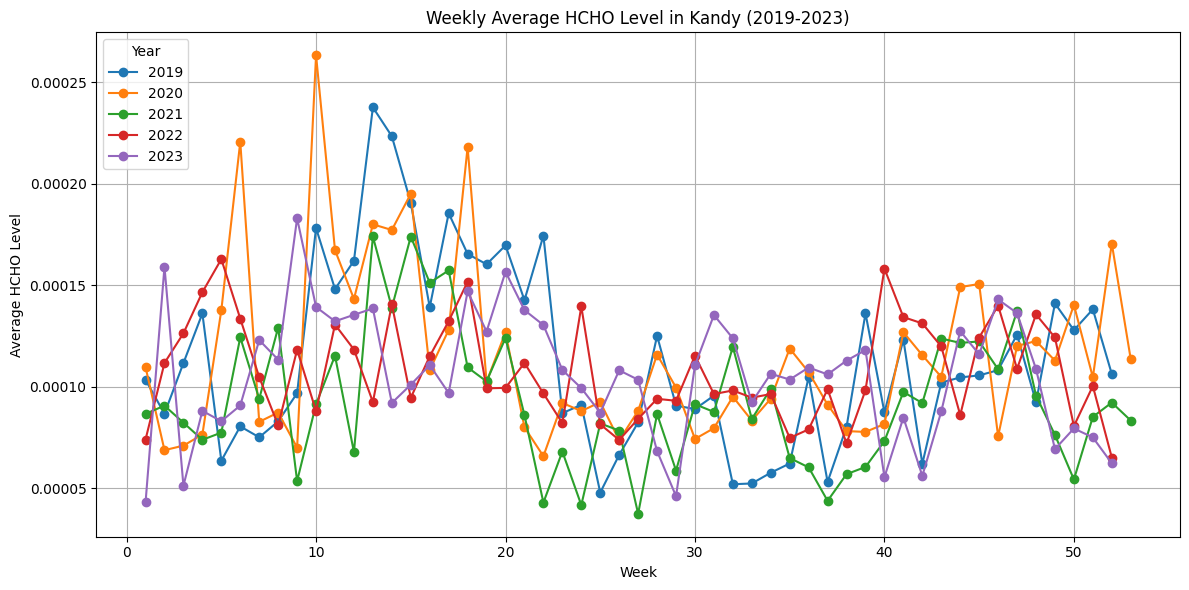

In [ ]:
plot_HCHO_average_vs_week(kan_data_mean_filled, 'Kandy')

#Loading Tempurature and Precipitation Data

Reading Temp Data for Kur, Col, Nuw

In [ ]:
kur_col_nuw_precip_temp = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/3620606.csv", header=True)

kur_col_nuw_precip_temp.show()


In [ ]:
Colombo_Temp_Data = kur_col_nuw_precip_temp.filter(kur_col_nuw_precip_temp['NAME'] == 'COLOMBO, CE')
Kurunegala_Temp_Data = kur_col_nuw_precip_temp.filter(kur_col_nuw_precip_temp['NAME'] == 'KURUNEGALA, CE')
Nuwara_Eliya_Temp_Data = kur_col_nuw_precip_temp.filter(kur_col_nuw_precip_temp['NAME'] == 'NUWARA ELIYA, CE')


In [ ]:
null_values_per_column(Colombo_Temp_Data, 'Colombo')

In [ ]:
Colombo_Temp_Data.show()
Kurunegala_Temp_Data.show()
Nuwara_Eliya_Temp_Data.show()

In [ ]:
Nuwara_Eliya_Data_mean_filled.show()

##Joining the 2 datasets

In [ ]:

def join_Temp_data(df, Temp_df, how, column):
    joined_data = Temp_df.join(
        df,
        Temp_df[column] == df['Current Date'],
        how=how
    )

    return joined_data

In [ ]:
Colombo_Data_joined = join_Temp_data(Colombo_Data_mean_filled ,Colombo_Temp_Data, 'right', 'Date')
Colombo_Data_joined.show()


In [ ]:
row_count = Colombo_Data_joined.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

In [ ]:
def get_missing_dates(df, column):
  df_pd = df.toPandas()
  start_date = pd.to_datetime('2019-01-01')

  expected_date = start_date

  for index, row in df_pd.iterrows():
      current_date = pd.to_datetime(row[column])

      if current_date != expected_date:
          print(f"Expected: {expected_date}, Actual: {current_date}")

      expected_date = current_date + pd.DateOffset(days=1)

In [ ]:
get_missing_dates(Colombo_Temp_Data, 'DATE')

In [ ]:
Colombo_Data_joined_filtered_date = Colombo_Data_joined.filter(Colombo_Data_joined['Current Date'] == '2019-04-23')
Colombo_Data_joined_filtered_date.show()

In [ ]:
Kurunegala_Data_joined = join_Temp_data(Kurunegala_Data_mean_filled ,Kurunegala_Temp_Data,  'right', 'Date')
Nuwara_Eliya_Data_joined = join_Temp_data(Nuwara_Eliya_Data_mean_filled, Nuwara_Eliya_Temp_Data,  'right', 'Date')

In [ ]:
Kurunegala_Data_joined.show()
Nuwara_Eliya_Data_joined.show()

In [ ]:
null_values_per_column(Colombo_Data_joined, 'Colombo')


In [ ]:
null_values_per_column(Kurunegala_Data_joined, 'Kurunegala')

In [ ]:

def get_latest_date(df, column):
  # Find the latest date
  latest_date = df.agg({column: "max"}).collect()[0][0]

  # Print the latest date
  print("Latest date:", latest_date)


In [ ]:
get_latest_date(Colombo_Data_joined, 'Current Date')


#Loading Full Weather Dataset SL(2010-2023)

In [ ]:
SL_Weather_Data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/SriLanka_Weather_Dataset.csv", header=True)

# Show the DataFrame
SL_Weather_Data.show()

In [ ]:
null_values_per_column(SL_Weather_Data, 'Whole Dataset')

##Seperating Dataset By City

In [ ]:
def get_cities(df):
  df_pd = df.toPandas()
  print(df_pd['city'].value_counts())

In [ ]:
get_cities(SL_Weather_Data)

In [ ]:
Colombo_Weather_Data = SL_Weather_Data.filter(SL_Weather_Data['city'] == 'Colombo')

In [ ]:
Kandy_Weather_Data = SL_Weather_Data.filter(SL_Weather_Data['city'] == 'Kandy')
Jaffna_Weather_Data = SL_Weather_Data.filter(SL_Weather_Data['city'] == 'Jaffna')
Kurunegala_Weather_Data = SL_Weather_Data.filter(SL_Weather_Data['city'] == 'Kurunegala')
Matara_Weather_Data = SL_Weather_Data.filter(SL_Weather_Data['city'] == 'Matara')

In [ ]:
Kandy_Weather_Data.show()

##Filtering City Data to be >2019

In [ ]:
Colombo_Weather_Data_2019 = Colombo_Weather_Data.filter(Colombo_Weather_Data['time']>='2019-01-01')

In [ ]:
Kandy_Weather_Data_2019 = Kandy_Weather_Data.filter(Kandy_Weather_Data['time']>='2019-01-01')
Jaffna_Weather_Data_2019 = Jaffna_Weather_Data.filter(Jaffna_Weather_Data['time']>='2019-01-01')
Kurunegala_Weather_Data_2019 = Kurunegala_Weather_Data.filter(Kurunegala_Weather_Data['time']>='2019-01-01')
Matara_Weather_Data_2019 = Matara_Weather_Data.filter(Matara_Weather_Data['time']>='2019-01-01')


In [ ]:
Colombo_Weather_Data_2019.show()

In [ ]:
row_count = Colombo_Weather_Data_2019.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

In [ ]:
get_missing_dates(Colombo_Weather_Data_2019, 'time')

In [ ]:
get_missing_dates(Kandy_Weather_Data_2019, 'time')

In [ ]:
get_latest_date(Colombo_Weather_Data_2019, 'time')

In [ ]:
get_latest_date(Kandy_Weather_Data_2019, 'time')

##Selecting Relevant Data

In [ ]:

def select_importatnt_features(df):
  df_selected = df.select(
      "time",
      "weathercode",
      "apparent_temperature_max",
      "apparent_temperature_min",
      "apparent_temperature_mean",
      "shortwave_radiation_sum",
      "precipitation_sum",
      "rain_sum",
      "windspeed_10m_max",
      "winddirection_10m_dominant",
      "et0_fao_evapotranspiration",
      "latitude",
      "longitude",
      "elevation",
      "city"
  )
  return df_selected

Colombo_Weather_Data_2019_selected = select_importatnt_features(Colombo_Weather_Data_2019)
Colombo_Weather_Data_2019_selected.show()


In [ ]:
Kandy_Weather_Data_2019_selected = select_importatnt_features(Kandy_Weather_Data_2019)
Jaffna_Weather_Data_2019_selected = select_importatnt_features(Jaffna_Weather_Data_2019)
Kurunegala_Weather_Data_2019_selected = select_importatnt_features(Kurunegala_Weather_Data_2019)
Matara_Weather_Data_2019_selected = select_importatnt_features(Matara_Weather_Data_2019)

In [ ]:
Colombo_Data_full = join_Temp_data(Colombo_Data_mean_filled ,Colombo_Weather_Data_2019_selected, 'left', 'time')
Colombo_Data_full.show()

In [ ]:
Kandy_Data_full = join_Temp_data(kan_data_mean_filled ,Kandy_Weather_Data_2019_selected, 'left', 'time')
Jaffna_Data_full = join_Temp_data(Jaffna_Data_mean_filled ,Jaffna_Weather_Data_2019_selected, 'left', 'time')
Kurunegala_Data_full = join_Temp_data(Kurunegala_Data_mean_filled ,Kurunegala_Weather_Data_2019_selected, 'left', 'time')
Matara_Data_full = join_Temp_data(Deniyaya_Matara_Data_mean_filled ,Matara_Weather_Data_2019_selected, 'left', 'time')

In [ ]:
row_count = Colombo_Data_full.count()
# Print the count
print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

In [ ]:
get_latest_date(Colombo_Data_full, 'Current Date')


In [ ]:
null_values_per_column(Colombo_Data_full, 'Colombo')

#Finding correlation

In [ ]:

def print_correlation_matrix(df, name):
    columns_to_remove = ['weathercode', 'latitude', 'longitude', 'elevation','time', 'city', 'Location', 'Current Date', 'Next Date', 'month']

    df_filtered = df.drop(*columns_to_remove)

    df_pd = df_filtered.toPandas()
    correlation_matrix = df_pd.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Matrix for {name}")
    plt.show()

print_correlation_matrix(Colombo_Data_full, 'Colombo')



In [ ]:
print_correlation_matrix(Kandy_Data_full, 'Kandy')

In [ ]:
print_correlation_matrix(Jaffna_Data_full, 'Jaffna')

In [ ]:
print_correlation_matrix(Kurunegala_Data_full, 'Kurunegala')

In [ ]:
print_correlation_matrix(Matara_Data_full, 'Matara')